# COGS 108 - Vaccination Rate and State Economy Recovery

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this project, we explored how vaccination inequality correlated with the economic recovery of the states in the U.S. in the situation that Covid-19 had negatively affected the U.S. economy. We linked changes in GDP and unemployment rates by states to vaccination rates (by race and by age) for 2019, 2020, and 2021. After cleaning and analyzing the data, we drove to a conclusion that the vaccination inequality by race and age was not strongly correlated with the economy. 

# Presentation Video

https://drive.google.com/file/d/1S_-uBdRwimLnQvDgDrw0uM_4V0cikZZK/view?usp=sharing

# Names

- Yuchen Jin
- Shihan Qian
- Tessa Liu
- Enhao Wan
- Jiying Wang

<a id='research_question'></a>
# Research Question

How does the vaccination rate in each state correlate with economic recovery? Add on to that, does vaccination inequality regarding different ages and races undermine the economic recovery?

## Background and Prior Work

<big>Introduction:</big>

The epidemic seems to have become the main theme of people's lives. We have no choice but to get used to the epidemic, admit that it has “accompanied” us for nearly two years, and will probably still be inseparable with us for a period of time on our road. As a group, we all know the importance of getting the vaccination and it is possibly the best solution to end the pandemic. Recently, all Universities of California are returning to in-person learning mode after experiencing the one-year lockdown and remote situation, and students are required to take vaccination before coming to school. Almost everyone in California can easily access the vaccination, nevertheless, we notice that some states are still experiencing both high daily increases in cases with low vaccination rates. Since the outbreak of Covid, the pandemic has significantly affected everyone in the world. It disrupted lives across all countries and communities and negatively affected the global and regional economy. Since the first vaccine dose was administered, about 50 million Americans have been vaccinated at least one shot [1]. In march 2021,President Joe Biden allocated $15 billion to support vaccine manufacturing and distribution, which greatly helped the spread of vaccines and further signifies the importance of vaccination. In addition, we can see that the economy has been improved by some diseases being greatly reduced or eradicated by vaccinations throughout history, like smallpox and polio. Thus, we are attempting to see if the pace of the economic recovery in each state is dependent on the pace of covid vaccinations where the population in the states is divided into groups by ages, races, and enthinities.

<big>Prior work:</big>

Similar analyses have been done before. One study given by Penn Wharton examined the epidemiological and economic effects of the covid vaccine. The research estimated and projected social and economic behavior based on three measures, it inferred the social response, the frequency of close physical proximity between different individuals outside the home to reflect the social distancing.The GDP and employment rate is the indicator of the economic response. By the Penn Wharton Budget Model, it projects that doubling the number of vaccine doses administered daily to 3 million per day would boost employment by more than 2 million and real GDP by about 1 percent over the summer, with smaller effects later in the year.

The reason to analyze the vaccination population stratified into different age, race, and enthinities groups is because in the paper, Latest Data on COVID-19 Vaccinations by Race/Ethnicity, it examined the unevenness of vaccination coverage between different races and ages. From the data, we could see that Black and Hispanic people have been less likely than their White counterparts to receive a vaccine. Also, the percentage of vaccination is different between different age groups. Since recently, the booster shot eligibility expanded to all individuals, including children ages 5-11. Thus, we have to take the inequity in vaccination distribution into consideration while analyzing the data.

 
<big>References:</big>
- 1.https://budgetmodel.wharton.upenn.edu/issues/2021/3/1/epidemiological-and-economic-effects-of-covid-19-vaccine
- 2.https://www.kff.org/coronavirus-covid-19/issue-brief/latest-data-on-covid-19-vaccinations-by-race-ethnicity/


# Hypothesis


The number of vaccinations in each state was positively correlated with economic recovery. Vaccination inequality undermines economic recovery. Vaccination rates are higher for adults than for older adults, and lowest for children ages 5 to 11. Whites have the highest vaccination rates; blacks and Hispanics are behind. The higher the vaccination rates for minorities other than whites, the faster the state's economic recovery. To be more specific, the economic recovery rate by measuring the unemployment and GDP increases when the unequal distribution of vaccination between different races (blacks, white, hispanic, asian, others) and different ages gets smaller. 

# Setup

In [324]:
## YOUR CODE HERE
import sys
get_ipython().system('{sys.executable} -m pip install openpyxl')

# Imports
import numpy as np
import openpyxl
from openpyxl.styles import Border, Side, Font, PatternFill
import pandas as pd

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

### GDP by State

In [325]:
# Since the downloaded data are in two excel files and contains a lot of datas we don't need, we created a new file and transfer datas we need to there. 
border_type = Side(border_style='thin', color='FF000000')
border = Border(left=border_type, right=border_type, top=border_type, bottom=border_type)
string = ['gdp0321', 'gdp1221']
new_csv = openpyxl.Workbook('new.xlsx')
new_csv.save('new.xlsx')
new_csv = openpyxl.load_workbook('new.xlsx') 
new_csv_ws = new_csv.create_sheet('data', index=0)
sheet_new_csv = new_csv.get_sheet_by_name('data')

In [326]:
# Delete datas about the sum of regions
for str_ in string:

    df = openpyxl.load_workbook(str_ + '.xlsx') 
    df.encoding = 'utf-8'
    sheet_name = df.sheetnames
    print(sheet_name)

    for i in range(len(sheet_name)):
        sheet = df.get_sheet_by_name(sheet_name[i])
        delete_e_row = ['United States', 'New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest',
                        'Rocky Mountain', 'Far West']
        delete_row = []
# Find null values. Due to observation, it is found that the line with the null value was the total GDP of the region, which is not needed for our topic, so the line with the null value was deleted. 
    for row in range(1, sheet.max_row + 1, 1):
        a = str(sheet.cell(row=row, column=1).value)
        b = a.strip()
        for element in delete_e_row:
            if b == element:
                    delete_row.append(row)
        if delete_row is not []:
            for m in delete_row:
                k = delete_row.index(m)
                sheet.delete_rows(m - k)
    for i in range(len(sheet_name)):  
        sheet = df.get_sheet_by_name(sheet_name[i])
        delete_row = []
        for row in range(1, sheet.max_row + 1, 1):  
            for column in range(2, sheet.max_column + 1, 1):
                if sheet.cell(row=row, column=column).value == '.......':
                    delete_row.append(row)
        for m in delete_row:  
            k = delete_row.index(m)
            sheet.delete_rows(m - k)

['Table 1', 'Table 2', 'Table 2 continued', 'Table 3', 'Table 4', 'Table 5', 'Table 5 continued']
['Table 1', 'Table 2', 'Table 2 continued', 'Table 3']


In [327]:
# Extract the tables and data from the two Excel files and put them into the new table. Change the table header. Convert the format of the new table to CSV.
sheet_c = df.get_sheet_by_name('Table 3')
if str_ == 'gdp0321':  
    for x_column in range(1, 10, 1):
        for x_row in range(6, sheet_c.max_row + 1, 1):
            sheet_new_csv.cell(row=x_row - 4, column=x_column, value=sheet_c.cell(row=x_row, column=x_column).value)
    for x_column in range(2, 10, 1):
        if x_column < 6:
            sheet_new_csv.cell(row=1, column=x_column, value='2019Q' + str(x_column - 1))
        if x_column >= 6:
            sheet_new_csv.cell(row=1, column=x_column, value='2020Q' + str(x_column - 5))
                
    sheet_d = df.get_sheet_by_name('Table 4')
    for x_column in range(4, 6, 1):
        for x_row in range(4, sheet_d.max_row + 1, 1):
            sheet_new_csv.cell(row=x_row - 2, column=x_column + 10,
                                   value=sheet_d.cell(row=x_row, column=x_column).value)
    for x_row in range(4, sheet_d.max_row + 1, 1):
        sheet_new_csv.cell(x_row - 2, column=3 + 10, value=sheet_d.cell(row=x_row, column=1).value)
    sheet_new_csv.cell(row=1, column=14, value='2019 Percent change in real GDP by state')
    sheet_new_csv.cell(row=1, column=15, value='2020 Percent change in real GDP by state')
else:  
    for x_column in range(6, 9, 1):
        for x_row in range(6, sheet_c.max_row + 1, 1):
            sheet_new_csv.cell(row=x_row - 4, column=x_column + 4, value=sheet_c.cell(row=x_row,
                                                                                          column=x_column).value)
    for x_column in range(6, 9, 1):
        if x_column < 6:
            sheet_new_csv.cell(row=1, column=x_column + 4, value='2020Q' + str(x_column - 1))
                # sheet_c.cell(row=5, column=x_column, value='2020Q' + str(x_column - 1))
        if x_column >= 6:
            sheet_new_csv.cell(row=1, column=x_column + 4, value='2021Q' + str(x_column - 5))
                # sheet_c.cell(row=5, column=x_column, value='2021Q' + str(x_column - 5))
    sheet_d = df.get_sheet_by_name('Table 2')
    for x_column in range(1, 3, 1):
        for x_row in range(5, sheet_d.max_row + 1, 1):
            sheet_new_csv.cell(row=x_row - 3, column=x_column + 15,
                                   value=sheet_d.cell(row=x_row, column=x_column).value)
        sheet_new_csv.cell(row=1, column=17, value='2021 Percent change in real GDP by state')

In [328]:
stategdp1 = pd.read_csv('stategdp1.csv')

stategdp1.shape

(56, 17)

In [329]:
stategdp1 = stategdp1.dropna(axis=0,how = 'all')
stategdp1 = stategdp1.dropna(axis=1,how = 'all')
stategdp1 = stategdp1.rename({'Unnamed: 0': "State"}, axis='columns')
stategdp1.head()


,State,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2019 Percent change in real GDP by state,2020 Percent change in real GDP by state,2021 Percent change in real GDP by state
0,Connecticut,285446.0,286646.0,288493.0,290703.0,288368.0,262708.0,283601.0,288923.0,285112.0,293595.0,298612.0,0.9,-4.1,2.5
1,Maine,66662.0,67053.0,68168.0,68985.0,68319.0,61496.0,67129.0,67839.0,73174.0,75214.0,76664.0,2.6,-4.1,1.8
2,Massachusetts,588308.0,594310.0,600545.0,603210.0,600740.0,546546.0,590307.0,598562.0,610700.0,629570.0,642038.0,2.4,-3.8,3.8
3,New Hampshire,87338.0,87343.0,87840.0,88015.0,88126.0,78691.0,86319.0,87300.0,92753.0,98746.0,99030.0,1.4,-4.7,-3.7
4,Rhode Island,61627.0,61805.0,61769.0,62335.0,61954.0,56285.0,61081.0,61578.0,62340.0,65700.0,66894.0,1.0,-4.5,2.2


### Vaccine Rate by Age

In [330]:
fullyVaccineRate_age = pd.read_csv('vaccined rates_age.csv')
fullyVaccineRate_age.head()

,State,Abreviation,5～11,12～17,18～64,65
0,Alabama,AL,7.70%,32.90%,53.60%,85.40%
1,Alaska,AK,20.10%,53.70%,66.80%,94.10%
2,Arizona,AZ,18.50%,53.90%,66.30%,91.80%
3,Arkansas,AR,13.70%,44.40%,57.90%,83.30%
4,California,CA,28.80%,68.90%,77.50%,94.10%


In [331]:
fullyVaccineRate_age = fullyVaccineRate_age.drop(columns=['Abreviation'])
fullyVaccineRate_age.head()

,State,5～11,12～17,18～64,65
0,Alabama,7.70%,32.90%,53.60%,85.40%
1,Alaska,20.10%,53.70%,66.80%,94.10%
2,Arizona,18.50%,53.90%,66.30%,91.80%
3,Arkansas,13.70%,44.40%,57.90%,83.30%
4,California,28.80%,68.90%,77.50%,94.10%


### Vaccine Rate by State

In [332]:
fullyVaccineRate_state = pd.read_csv('us_state_vaccinations.csv')

In [333]:
fullyVaccineRate_state.shape

(25636, 16)

In [334]:
fullyVaccineRate_state.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [335]:
fullyVaccineRate_state = fullyVaccineRate_state[(fullyVaccineRate_state['date'] == '2022-02-10') | (fullyVaccineRate_state['date'] == '2021-05-10')]
fullyVaccineRate_state = fullyVaccineRate_state[['date','location','people_fully_vaccinated_per_hundred']]

In [336]:
fullyVaccineRate_state.columns = ['Year','State', 'Percentage']

In [337]:
fullyVaccineRate_state.head()

,Year,State,Percentage
118,2021-05-10,Alabama,25.98
394,2022-02-10,Alabama,49.76
514,2021-05-10,Alaska,37.03
790,2022-02-10,Alaska,59.86
910,2021-05-10,American Samoa,31.77


In [338]:
fullyVaccineRate_state = fullyVaccineRate_state.reset_index().drop(columns=['index'])
fullyVaccineRate_state.loc[fullyVaccineRate_state["Year"] == '2022-02-10', "Year"] = 2022
fullyVaccineRate_state.loc[fullyVaccineRate_state["Year"] == '2021-05-10', "Year"] = 2021
fullyVaccineRate_state = fullyVaccineRate_state[fullyVaccineRate_state['State'] != 'Long Term Care']

In [339]:
fullyVaccineRate_state.head()

,Year,State,Percentage
0,2021,Alabama,25.98
1,2022,Alabama,49.76
2,2021,Alaska,37.03
3,2022,Alaska,59.86
4,2021,American Samoa,31.77


### Vaccine Rate by Race

In [340]:
race_rateq1 = pd.read_csv('2021_03.csv')
race_rateq2 = pd.read_csv('2021_06.csv')
race_rateq3 = pd.read_csv('2021_09.csv')
race_rateq4 = pd.read_csv('2022_01.csv')

In [341]:
race_rateq1.head()

,Title: Percent of Total Population that has Received a COVID-19 Vaccine by Race/Ethnicity | KFF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Timeframe: as of March 1, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Location,Race Categories Include Hispanic Individuals,% of Total White Population Vaccinated,% of Total Black Population Vaccinated,White to Black Ratio,Percentage Point Difference Between White and ...,% of Total Hispanic Population Vaccinated,White to Hispanic Ratio,Percentage Point Difference Between White and ...,% of Total Asian Population Vaccinated,White to Asian Ratio,Percentage Point Difference Between White and ...,Footnotes
2,United States,NaN,0.13,0.07,1.99,-6.67,0.05,2.57,-8.21,0.11,1.1,-2.13,NaN
3,Alabama,Yes,0.1,0.06,1.64,-3.88,NR,NR,NR,0.1,1.01,-0.05,1
4,Alaska,Yes,0.08,0.08,0.94,0.48,0.07,1.11,-0.77,0.09,0.86,1.27,NaN


In [342]:
race_rateq1.drop(index = race_rateq1.index[0],axis = 0,inplace = True)
race_rateq1.drop(race_rateq1.columns[[1,4,5,7,8,10,11,12]], axis=1, inplace=True)
race_rateq1.columns = ['Location','% of White','% of Black','% of Hispanic','% of Asian']
race_rateq1.drop(index = race_rateq1.index[0],axis = 0,inplace = True)
race_rateq1 = race_rateq1.reset_index(drop = True)
race_rateq1.drop(index = race_rateq1.index[52:],axis = 0,inplace = True)
race_rateq1 = race_rateq1[race_rateq1[['Location','% of White','% of Black','% of Hispanic','% of Asian']] != 'NR']
race_rateq1 = race_rateq1.dropna(how='any').reset_index(drop = True)
D = {'quarter':1}
race_rateq1 = pd.concat([race_rateq1, pd.DataFrame(D, index=race_rateq1.index)], axis=1)

In [343]:
race_rateq1.head()

,Location,% of White,% of Black,% of Hispanic,% of Asian,quarter
0,United States,0.13,0.07,0.05,0.11,1
1,Alaska,0.08,0.08,0.07,0.09,1
2,Arizona,0.14,0.06,0.04,0.11,1
3,Colorado,0.18,0.09,0.04,0.09,1
4,Connecticut,0.14,0.06,0.05,0.08,1


In [344]:
race_rateq2.drop(index = race_rateq2.index[0],axis = 0,inplace = True)
race_rateq2.drop(race_rateq2.columns[[1,4,5,7,8,10,11,12]], axis=1, inplace=True)
race_rateq2.columns = ['Location','% of White','% of Black','% of Hispanic','% of Asian']
race_rateq2.drop(index = race_rateq2.index[0],axis = 0,inplace = True)
race_rateq2 = race_rateq2.reset_index(drop = True)
race_rateq2.drop(index = race_rateq2.index[52:],axis = 0,inplace = True)
race_rateq2 = race_rateq2[race_rateq2[['Location','% of White','% of Black','% of Hispanic','% of Asian']] != 'NR']
race_rateq2 = race_rateq2.dropna(how='any').reset_index(drop = True)
D2 = {'quarter':2}
race_rateq2 = pd.concat([race_rateq2, pd.DataFrame(D2, index=race_rateq2.index)], axis=1)

In [345]:
race_rateq3.drop(index = race_rateq3.index[0],axis = 0,inplace = True)
race_rateq3.drop(race_rateq3.columns[[1,4,5,7,8,10,11,12]], axis=1, inplace=True)
race_rateq3.columns = ['Location','% of White','% of Black','% of Hispanic','% of Asian']
race_rateq3.drop(index = race_rateq3.index[0],axis = 0,inplace = True)
race_rateq3 = race_rateq3.reset_index(drop = True)
race_rateq3.drop(index = race_rateq3.index[52:],axis = 0,inplace = True)
race_rateq3 = race_rateq3[race_rateq3[['Location','% of White','% of Black','% of Hispanic','% of Asian']] != 'NR']
race_rateq3 = race_rateq3.dropna(how='any').reset_index(drop = True)
D3 = {'quarter':3}
race_rateq3 = pd.concat([race_rateq3, pd.DataFrame(D3, index=race_rateq3.index)], axis=1)

In [346]:
race_rateq4.drop(index = race_rateq4.index[0],axis = 0,inplace = True)
race_rateq4.drop(race_rateq4.columns[[1,4,5,7,8,10,11,12]], axis=1, inplace=True)
race_rateq4.columns = ['Location','% of White','% of Black','% of Hispanic','% of Asian']
race_rateq4.drop(index = race_rateq4.index[0],axis = 0,inplace = True)
race_rateq4 = race_rateq4.reset_index(drop = True)
race_rateq4.drop(index = race_rateq4.index[52:],axis = 0,inplace = True)
race_rateq4 = race_rateq4[race_rateq4[['Location','% of White','% of Black','% of Hispanic','% of Asian']] != 'NR']
race_rateq4 = race_rateq4.dropna(how='any').reset_index(drop = True)
D4 = {'quarter':4}
race_rateq4 = pd.concat([race_rateq4, pd.DataFrame(D4, index=race_rateq4.index)], axis=1)

In [347]:
df_all_race = pd.concat([race_rateq1, race_rateq2, race_rateq3, race_rateq4], axis = 0).reset_index(drop = True)
df_all_race

,Location,% of White,% of Black,% of Hispanic,% of Asian,quarter
0,United States,0.13,0.07,0.05,0.11,1
1,Alaska,0.08,0.08,0.07,0.09,1
2,Arizona,0.14,0.06,0.04,0.11,1
3,Colorado,0.18,0.09,0.04,0.09,1
4,Connecticut,0.14,0.06,0.05,0.08,1
...,...,...,...,...,...,...
144,Utah,0.64,0.75,0.56,0.85,4
145,Vermont,0.85,0.74,>.99,0.92,4
146,Virginia,0.66,0.65,0.77,0.98,4
147,Washington,0.62,0.69,0.61,0.88,4


In [348]:
df_all_race.dtypes


Location         object
% of White       object
% of Black       object
% of Hispanic    object
% of Asian       object
quarter           int64
dtype: object

In [349]:
def standardize_percent(string):
    string = string.lower()
    string = string.strip()
    string = string.replace(">","0")
    string = string.strip()
    try:
        output = float(eval(string))
    except:
        output = np.nan
    return output

In [350]:
df_all_race['% of Hispanic'] = df_all_race['% of Hispanic'].apply(standardize_percent)
df_all_race['% of White'] = df_all_race['% of White'].apply(standardize_percent)
df_all_race['% of Black'] = df_all_race['% of Black'].apply(standardize_percent)
df_all_race['% of Asian'] = df_all_race['% of Asian'].apply(standardize_percent)

In [351]:
df_all_race.dtypes

Location          object
% of White       float64
% of Black       float64
% of Hispanic    float64
% of Asian       float64
quarter            int64
dtype: object

### Unemployment Rate by State

In [352]:
unemployment_month = pd.read_excel("unemployment rate 19-21.xlsx")
#Drop the data of D.C. and Puerto Rico since they are not included in other datasets.
unemployment_month = unemployment_month.drop([8,51],axis = 0).reset_index(drop=True)

In [353]:
#Check the data type to see whether they are all numeric.
unemployment_month.dtypes

State        object
2019-Jan    float64
2019-Feb    float64
2019-Mar    float64
2019-Apr    float64
2019-May    float64
2019-Jun    float64
2019-Jul    float64
2019-Aug    float64
2019-Sep    float64
2019-Oct    float64
2019-Nov    float64
2019-Dec    float64
2020-Jan    float64
2020-Feb    float64
2020-Mar     object
2020-Apr     object
2020-May    float64
2020-Jun    float64
2020-Jul    float64
2020-Aug    float64
2020-Sep    float64
2020-Oct    float64
2020-Nov    float64
2020-Dec    float64
2021-Jan    float64
2021-Feb    float64
2021-Mar    float64
2021-Apr    float64
2021-May    float64
2021-Jun    float64
2021-Jul    float64
2021-Aug    float64
2021-Sep    float64
2021-Oct    float64
2021-Nov    float64
2021-Dec    float64
dtype: object

In [354]:
#Cnnvert non-numeric data into int. 
unemployment_month['2020-Mar'] = unemployment_month['2020-Mar'].astype(int)
unemployment_month['2020-Apr'] = unemployment_month['2020-Apr'].astype(int)

In [355]:
#Since we need the unemployment rate be presented by quarter, we need to divide the 12 months into 4 parts, take the respective means of them, and save the data in columns.
unemployment_month['19_Q1'] = (unemployment_month['2019-Jan']+unemployment_month['2019-Feb']+unemployment_month['2019-Mar'])/3
unemployment_month['19_Q2'] = (unemployment_month['2019-Apr']+unemployment_month['2019-May']+unemployment_month['2019-Jun'])/3
unemployment_month['19_Q3'] = (unemployment_month['2019-Jul']+unemployment_month['2019-Aug']+unemployment_month['2019-Sep'])/3
unemployment_month['19_Q4'] = (unemployment_month['2019-Oct']+unemployment_month['2019-Nov']+unemployment_month['2019-Dec'])/3
unemployment_month['20_Q1'] = (unemployment_month['2020-Jan']+unemployment_month['2020-Feb']+unemployment_month['2020-Mar'])/3
unemployment_month['20_Q2'] = (unemployment_month['2020-Apr']+unemployment_month['2020-May']+unemployment_month['2020-Jun'])/3
unemployment_month['20_Q3'] = (unemployment_month['2020-Jul']+unemployment_month['2020-Aug']+unemployment_month['2020-Sep'])/3
unemployment_month['20_Q4'] = (unemployment_month['2020-Oct']+unemployment_month['2020-Nov']+unemployment_month['2020-Dec'])/3
unemployment_month['21_Q1'] = (unemployment_month['2021-Jan']+unemployment_month['2021-Feb']+unemployment_month['2021-Mar'])/3
unemployment_month['21_Q2'] = (unemployment_month['2021-Apr']+unemployment_month['2021-May']+unemployment_month['2021-Jun'])/3
unemployment_month['21_Q3'] = (unemployment_month['2021-Jul']+unemployment_month['2021-Aug']+unemployment_month['2021-Sep'])/3
unemployment_month['21_Q4'] = (unemployment_month['2021-Oct']+unemployment_month['2021-Nov']+unemployment_month['2021-Dec'])/3


In [356]:
unemployment_month.head()

,State,2019-Jan,2019-Feb,2019-Mar,2019-Apr,2019-May,2019-Jun,2019-Jul,2019-Aug,2019-Sep,...,19_Q3,19_Q4,20_Q1,20_Q2,20_Q3,20_Q4,21_Q1,21_Q2,21_Q3,21_Q4
0,Alabama,3.6,3.5,3.3,3.2,3.1,2.9,2.9,2.8,2.8,...,2.833333,2.733333,2.433333,9.533333,7.066667,4.700000,4.033333,3.433333,3.133333,3.100000
1,Alaska,5.8,5.7,5.6,5.5,5.4,5.4,5.4,5.4,5.3,...,5.366667,5.066667,5.033333,11.300000,8.400000,6.500000,6.600000,6.633333,6.433333,5.933333
2,Arizona,5.0,5.0,5.0,4.9,4.9,4.9,4.9,4.8,4.8,...,4.833333,4.700000,4.900000,11.766667,8.100000,6.800000,6.766667,6.733333,6.166667,4.666667
3,Arkansas,3.6,3.6,3.5,3.4,3.4,3.5,3.5,3.5,3.5,...,3.500000,3.533333,3.500000,8.766667,6.500000,5.266667,4.500000,4.400000,4.166667,3.400000
4,California,4.3,4.3,4.2,4.1,4.1,4.1,4.1,4.1,4.1,...,4.100000,4.133333,4.166667,15.233333,12.033333,9.266667,8.600000,7.966667,7.533333,6.900000


In [357]:
#Create a new dataframe to store these columns that we need.
data = [unemployment_month['State'],unemployment_month['19_Q1'],unemployment_month['19_Q2'],unemployment_month['19_Q3'],unemployment_month['19_Q4'],unemployment_month['20_Q1'],unemployment_month['20_Q2'],unemployment_month['20_Q3'],unemployment_month['20_Q4'],unemployment_month['21_Q1'],unemployment_month['21_Q2'],unemployment_month['21_Q3'],unemployment_month['21_Q4']]
headers = ['State','19_Q1','19_Q2','19_Q3','19_Q4','20_Q1','20_Q2','20_Q3','20_Q4','21_Q1','21_Q2','21_Q3','21_Q4']
unemployment_quarter = pd.concat(data,axis=1,keys = headers)

In [358]:
unemployment_quarter.head()

,State,19_Q1,19_Q2,19_Q3,19_Q4,20_Q1,20_Q2,20_Q3,20_Q4,21_Q1,21_Q2,21_Q3,21_Q4
0,Alabama,3.466667,3.066667,2.833333,2.733333,2.433333,9.533333,7.066667,4.700000,4.033333,3.433333,3.133333,3.100000
1,Alaska,5.700000,5.433333,5.366667,5.066667,5.033333,11.300000,8.400000,6.500000,6.600000,6.633333,6.433333,5.933333
2,Arizona,5.000000,4.900000,4.833333,4.700000,4.900000,11.766667,8.100000,6.800000,6.766667,6.733333,6.166667,4.666667
3,Arkansas,3.566667,3.433333,3.500000,3.533333,3.500000,8.766667,6.500000,5.266667,4.500000,4.400000,4.166667,3.400000
4,California,4.266667,4.100000,4.100000,4.133333,4.166667,15.233333,12.033333,9.266667,8.600000,7.966667,7.533333,6.900000


# Data Analysis & Results (EDA)

In [359]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.stats import norm
import patsy
import statsmodels.api as sm

### GDP by State

In [360]:
#Calculate data and turnover data so that it is arranged quarterly for later use
rawdata = stategdp1
rawdata = rawdata.dropna(axis=0, how="all")
rawdata = rawdata.dropna(axis=1, how="all")
rawdata = rawdata.rename({"Unnamed: 0": "State"}, axis="columns")
qua_data=rawdata
column=qua_data.columns.tolist()[1:12]
def count_acc(x1,x2):
    return round((x2-x1)/x1,6)
acc_data=pd.DataFrame()
for i in range(1,len(column)):
    acc_data=pd.concat([acc_data,pd.DataFrame(count_acc(qua_data[column[i-1]],qua_data[column[i]]),columns=[column[i]+'_acc'])],axis=1)
acc_data.head()
qua_data=pd.concat([qua_data,acc_data],axis=1)
qua_data=qua_data.iloc[:,[0]+list(range(-10,0))]

data_name=qua_data.State
qua_data=qua_data.iloc[:,1:]
qua_data=qua_data.T
qua_data.columns=data_name
stategdp1=rawdata

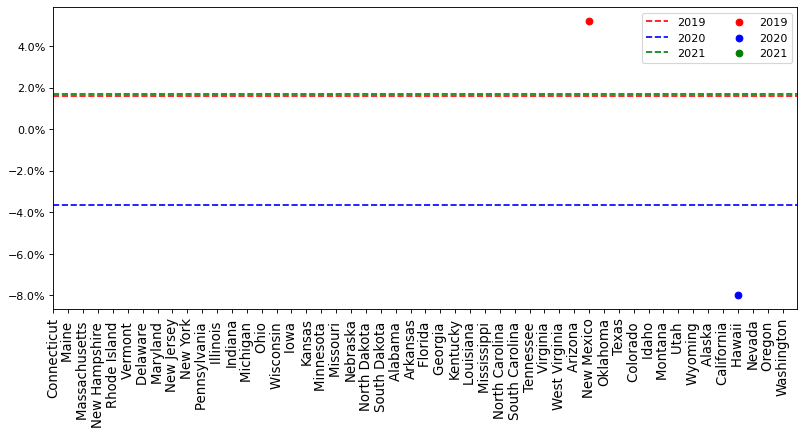

In [361]:
#Detect outliers for State GDP in 2019-2021
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = sr.loc[(sr < fence_low) | (sr > fence_high)]
    return outliers

#Find the median of the annual GDP's percent change and draw a line as indicators
median_lst=[]
for i in range(-3,0):
    median_lst.append(round(stategdp1.iloc[:,i].median(),3))

plt.figure(figsize=(12,5), dpi=80)
x=list(range(0,50))
x_label=stategdp1.iloc[:,0]
plt.xlim(0,50)
plt.xticks(x,x_label,rotation=90,size=12)
ax=plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=1))

# Draw outlier points
plt.scatter(detect_outliers(stategdp1.iloc[:,-3]).index,detect_outliers(stategdp1.iloc[:,-3]).values[0],color='red',label='2019')
plt.scatter(detect_outliers(stategdp1.iloc[:,-2]).index,detect_outliers(stategdp1.iloc[:,-2]).values[0],color='blue',label='2020')
plt.scatter(-10,0,color='green',label='2021')

#Draw lines of yearly median
ax.axhline(y=median_lst[0], color='red' , linestyle='--',label='2019')
ax.axhline(y=median_lst[1], color='blue' , linestyle='--',label='2020')
ax.axhline(y=median_lst[2], color='green' , linestyle='--',label='2021')

plt.legend(loc='upper right',ncol=2)

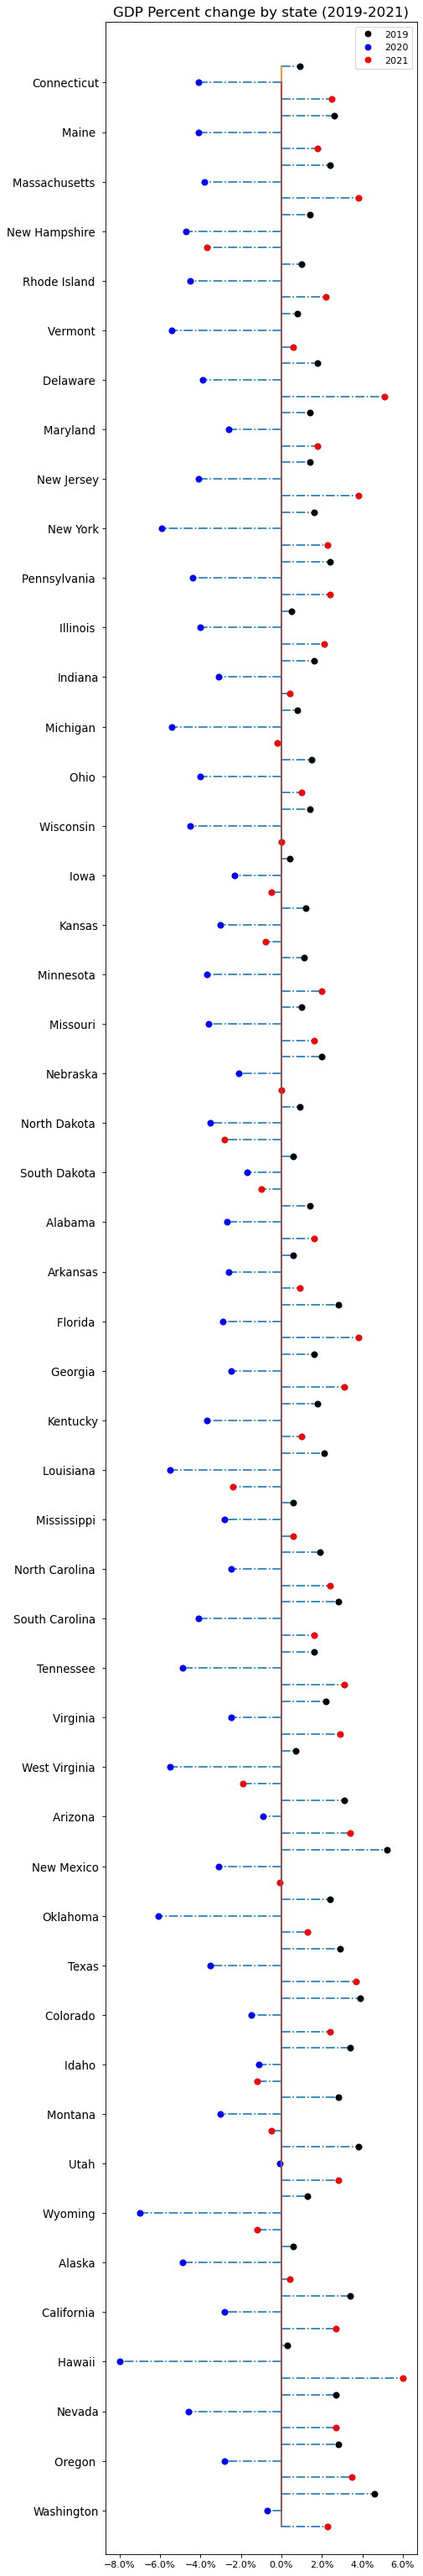

In [362]:
#Show and compare each state's percentage rate of change in GDP over a three-year period
gdp_list=[]
for i in stategdp1.iloc:
    gdp_list.append(i[12])
    gdp_list.append(i[13])
    gdp_list.append(i[14])
plt.figure(figsize=(6,50), dpi=80)
y=list(range(3,453,3))
y_index=list(range(6,450,9))
y_label=stategdp1.iloc[:,0]
x=[i/100 for i in gdp_list]
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.scatter(x,y)
plt.yticks(y_index,y_label,rotation='horizontal',size=12)
markerline1, stemlines, baseline=plt.stem(y[0::3],x[0::3],linefmt="-.",markerfmt="o",basefmt="-",orientation='horizontal')
markerline2, stemlines, baseline=plt.stem(y[1::3],x[1::3],linefmt="-.",markerfmt="o",basefmt="-",orientation='horizontal')
markerline3, stemlines, baseline=plt.stem(y[2::3],x[2::3],linefmt="-.",markerfmt="o",basefmt="-",orientation='horizontal')
plt.setp(markerline1, color='black',label='2019')
plt.setp(markerline2, color='b',label='2020')
plt.setp(markerline3, color='r',label='2021')
plt.ylim(455,-5)
plt.title('GDP Percent change by state (2019-2021)',size=15)
plt.legend()

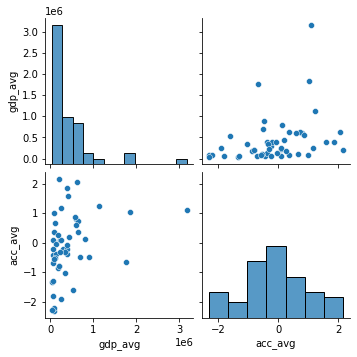

In [363]:
#Variable Correlation

gdp_mead= round(stategdp1.iloc[:,list(range(1,12))].mean(axis=1),2)
acc_mead= round(stategdp1.iloc[:,list(range(12,15))].mean(axis=1),2)
stategdp1=pd.concat([stategdp1['State'],gdp_mead,acc_mead],axis=1)
stategdp1.columns=['state','gdp_avg','acc_avg']
sns.pairplot(stategdp1) 

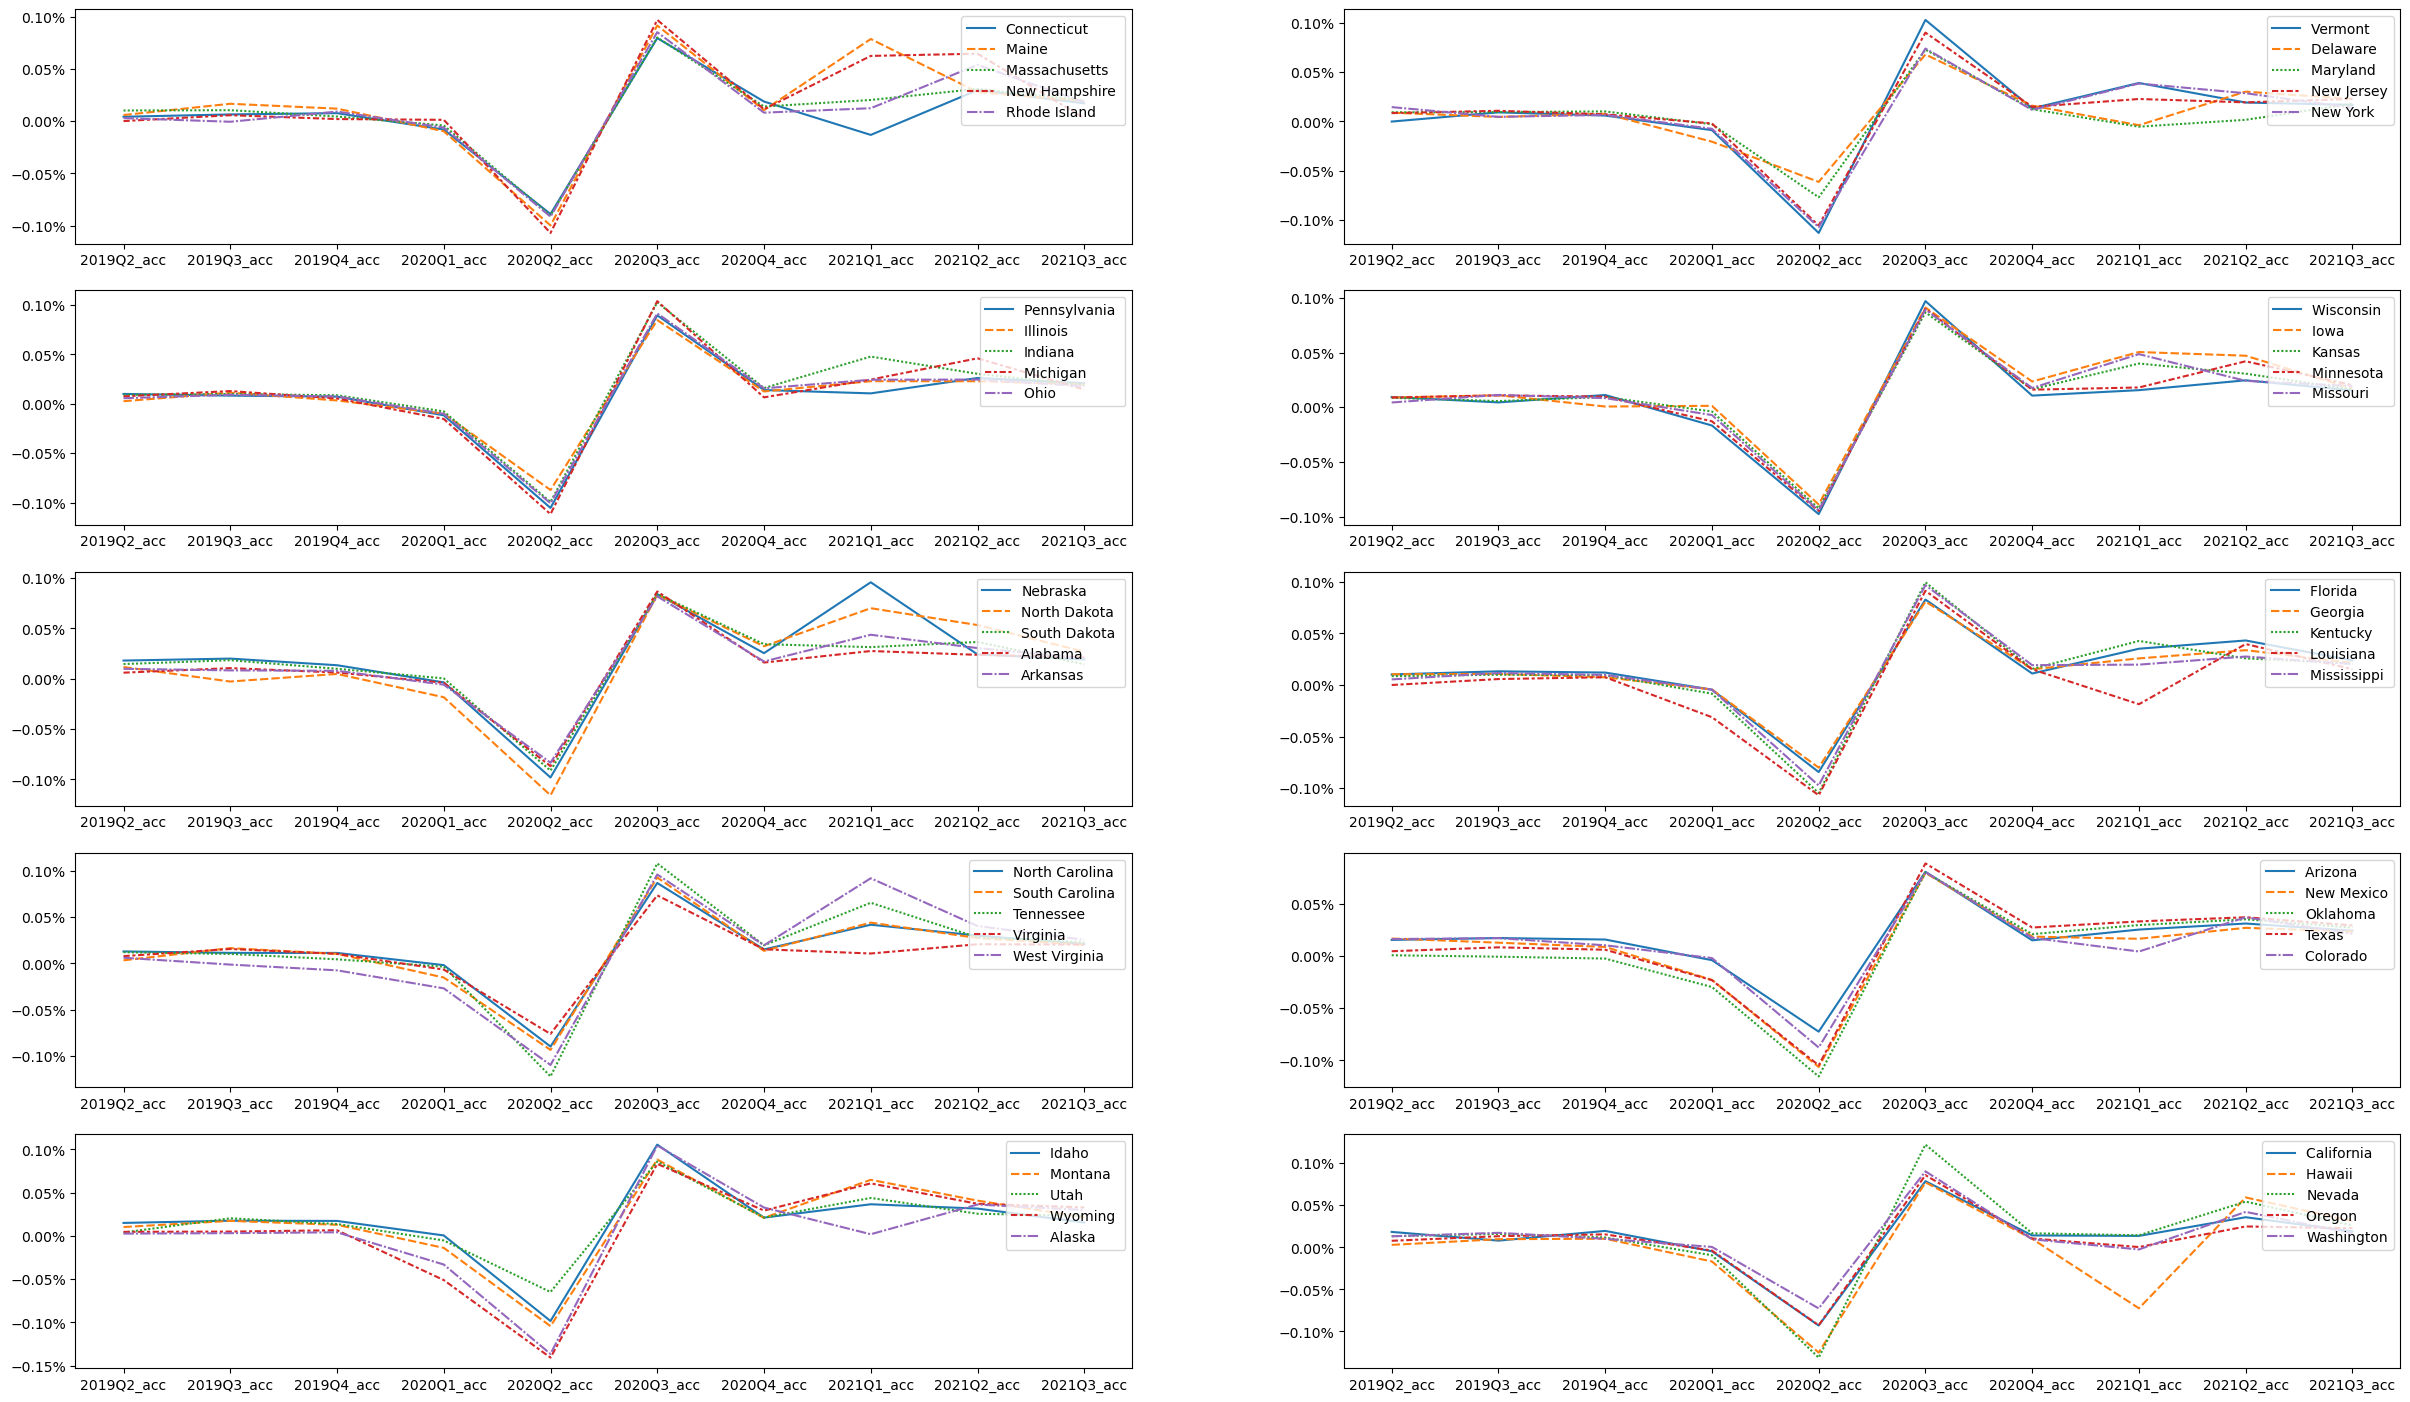

In [364]:
#View and plot the quarterly GDP fluctuations for 50 States over the three years in 2019-2021

stategdp1=qua_data

plt.figure(figsize=(30,18), dpi=100)
for i in range(1,11):
    ax=plt.subplot(5,2,i)
    fig=sns.lineplot(data=stategdp1.iloc[:,0+5*(i-1):5*i], ax = ax)
    fig.legend(loc='upper right')
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=2))

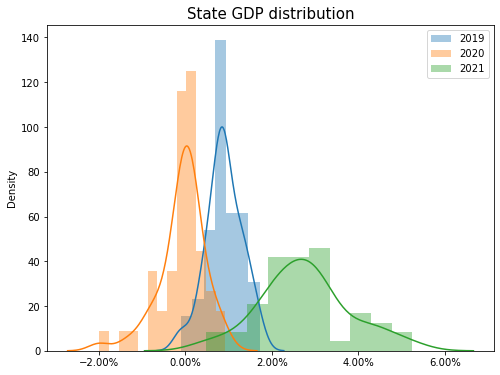

In [365]:
#Check 2019, 2020, 2021's state GDP distribution

year_acc=[]
warnings.filterwarnings("ignore")
year_acc.append(stategdp1.iloc[0:3].mean(axis=0))
year_acc.append(stategdp1.iloc[3:7].mean(axis=0))
year_acc.append(stategdp1.iloc[7:11].mean(axis=0))
years=['2019','2020','2021']

plt.figure(figsize=(8, 6))
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))

for i in range(3):
    ax = sns.distplot(year_acc[i],label=years[i],)
    plt.title('State GDP distribution', fontsize=15)
    plt.legend()


### Vaccine Rate by Age

In [366]:
name = fullyVaccineRate_age.values[:, 0]
afullyVaccineRate_age = fullyVaccineRate_age
afullyVaccineRate_age = afullyVaccineRate_age.drop(columns=['State'])
afullyVaccineRate_age.head()
data = afullyVaccineRate_age.values
value = []
for row in data:
    list_ = []
    for num in row:
        num = float(num.strip('%'))
        list_.append(num / 100)
    value.append(list_)

In [367]:
afullyVaccineRate_age = pd.DataFrame(value)

In [368]:
std = afullyVaccineRate_age.std(axis=1)
std.describe()

count    50.000000
mean      0.298298
std       0.030874
min       0.196090
25%       0.277809
50%       0.305014
75%       0.320673
max       0.346568
dtype: float64

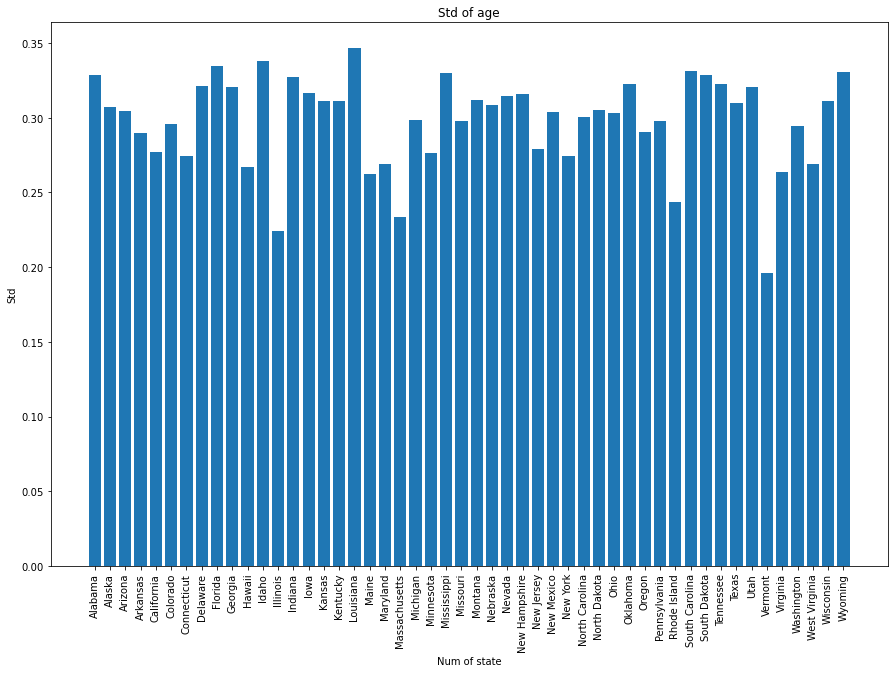

In [369]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(1, len(std)+1), std)
plt.xlabel('Num of state')
plt.xticks(np.arange(1, len(std)+1), name, rotation=90)
plt.ylabel('Std')
plt.title('Std of age')
plt.show()

In [370]:
std.describe()

count    50.000000
mean      0.298298
std       0.030874
min       0.196090
25%       0.277809
50%       0.305014
75%       0.320673
max       0.346568
dtype: float64

The value of variables are close, meaning that the age standard deviations of states are not different significnatly. In other words, each state has a very similar pattern of vaccination in age aspect. 

In [371]:
q1 = std.quantile(0.25)
q3 = std.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low = q1-1.5*iqr
fence_high = q3+1.5*iqr
outliers = std.loc[(std < fence_low) | (std > fence_high)]
outliers

44    0.19609
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa145a01ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa145a10490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa145a01910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa145a10bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa145a10f40>],
 'means': []}

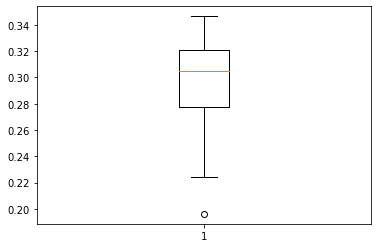

In [372]:
plt.boxplot(std)

From the plots above, I observed that the difference between std of states by age is not significant. All the values are close to other. And there are only one outlier, which is the 44th state, Vermont. That's because Vermont has the highest vaccination rates among residents under 18. 





### Vaccine Rate by State

In [373]:
fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2021].describe()

,Percentage
count,60.000000
mean,34.267833
std,6.092849
min,15.450000
25%,30.362500
50%,34.775000
75%,38.040000
max,50.990000


In [374]:
fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2022].describe()

,Percentage
count,60.000000
mean,63.026500
std,11.180892
min,29.990000
25%,55.105000
50%,61.330000
75%,70.762500
max,81.760000


The mean of fully vaccinated rate as of 2022 February is around 63%, while the median being around 61%. We can see that the data is skewed to the left. However, the mean as of 2021 May is less skewed according to the discription, with a lower mean and standard diviation. Let's now take a look at the overall distribution of vaccine rate per state.

<AxesSubplot:xlabel='Percentage', ylabel='Density'>

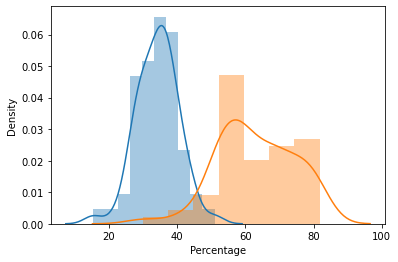

In [375]:
sns.distplot(fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2021]["Percentage"])
sns.distplot(fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2022]["Percentage"])

The data for 2021 looks more like a normal distribution. However, the data for 2022 does not resemble a normal distribution. While the left half of it looks more normally distributed, much more states have a fully vaccinated rate of 70% to 80%, making the slope more gentle than the other side.

Both lines doesn't suggest that there're a lot of outliers. Let's find the outliers for both 2021 and 2022 using boxplots.

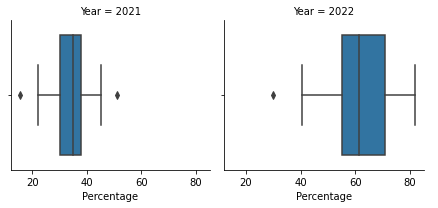

In [376]:
g = sns.FacetGrid(fullyVaccineRate_state, col="Year")
g.map(sns.boxplot, "Percentage")
g.add_legend()

It turns out that we do have outliers, two for year 2021 and one for year 2022.

To further explorer the dataset, let's look at the change in vaccination rate over the year.

In [377]:
vChangePerState = fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2022]["Percentage"].reset_index(drop = True)-fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2021]["Percentage"].reset_index(drop = True)
vChangePerState = vChangePerState.to_frame()
vChangePerState.insert(0, "State", fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2022]["State"].reset_index(drop = True), True)
vChangePerState.insert(2, "2021", fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2021]["Percentage"].reset_index(drop = True), True)
vChangePerState.insert(3, "2022", fullyVaccineRate_state[fullyVaccineRate_state['Year'] == 2022]["Percentage"].reset_index(drop = True), True)
vChangePerState.columns = ['State','Change','2021','2022']
vChangePerState.head()

,State,Change,2021,2022
0,Alabama,23.78,25.98,49.76
1,Alaska,22.83,37.03,59.86
2,American Samoa,48.18,31.77,79.95
3,Arizona,27.46,31.91,59.37
4,Arkansas,25.07,27.95,53.02


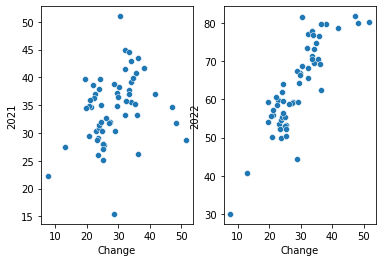

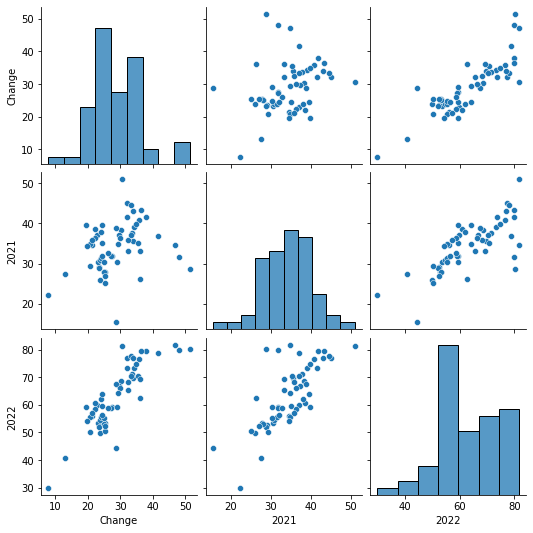

In [378]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=vChangePerState, x="Change", y="2021", ax= axs[0])
sns.scatterplot(data=vChangePerState, x="Change", y="2022", ax= axs[1])
sns.pairplot(vChangePerState) 

Interestingly, we can see a correlation between the change in vaccine rate and the vaccine rate as of 2022 February, while the graph on the left seems more random. It might because of the lack of vaccine in the beginning of the pandemic. When there's not enought vaccines, the vaccine rate depends on the vaccine supply. As the doses becomes more available, the vaccine rate depends more on people's will of getting the vaccine, and it tend to satuarate at some point.

### Vaccine Rate by Race

In [379]:
df_all_race.describe()

,% of White,% of Black,% of Hispanic,% of Asian,quarter
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.459799,0.382416,0.390738,0.562685,2.624161
std,0.193585,0.203160,0.224403,0.285644,1.087251
min,0.080000,0.030000,0.020000,0.000000,1.000000
25%,0.350000,0.270000,0.260000,0.440000,2.000000
50%,0.490000,0.400000,0.420000,0.630000,3.000000
75%,0.590000,0.520000,0.560000,0.770000,4.000000
max,0.860000,0.990000,0.990000,0.990000,4.000000


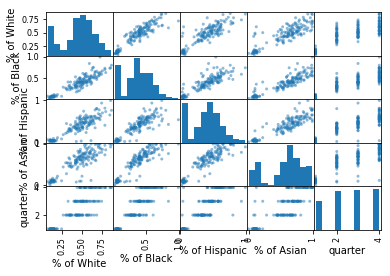

In [380]:
fig = pd.plotting.scatter_matrix(df_all_race)

In [381]:
avg_white = df_all_race['% of White'].mean()
avg_black = df_all_race['% of Black'].mean()
avg_hispanic = df_all_race['% of Hispanic'].mean()
avg_asian = df_all_race['% of Asian'].mean()

In [382]:
print('Average vaccination percentage of white is {:2.2f}'.format(avg_white))
print('Average vaccination percentage of black is {:2.2f}'.format(avg_black))
print('Average vaccination percentage of hispanic is {:2.2f}'.format(avg_hispanic))
print('Average vaccination percentage of asian is {:2.2f}'.format(avg_asian))

Average vaccination percentage of white is 0.46
Average vaccination percentage of black is 0.38
Average vaccination percentage of hispanic is 0.39
Average vaccination percentage of asian is 0.56


In [383]:
df_all_race["quarter"]= df_all_race["quarter"].astype(str)
df_all_race["standard deviation"] = df_all_race.std(axis = 1, skipna = True)

The standard deviation of each row is to measure the difference of vaccination rate between 4 races, so that we can get a 
measurement for the inequity of race. If the standard deviation is higher, it means that the inequity of this state is higher, which says 4 races have larger difference in vaccination rate.

In [384]:
df_all_race

,Location,% of White,% of Black,% of Hispanic,% of Asian,quarter,standard deviation
0,United States,0.13,0.07,0.05,0.11,1,0.036515
1,Alaska,0.08,0.08,0.07,0.09,1,0.008165
2,Arizona,0.14,0.06,0.04,0.11,1,0.045735
3,Colorado,0.18,0.09,0.04,0.09,1,0.058310
4,Connecticut,0.14,0.06,0.05,0.08,1,0.040311
...,...,...,...,...,...,...,...
144,Utah,0.64,0.75,0.56,0.85,4,0.126754
145,Vermont,0.85,0.74,0.99,0.92,4,0.106615
146,Virginia,0.66,0.65,0.77,0.98,4,0.153297
147,Washington,0.62,0.69,0.61,0.88,4,0.125167


In [385]:
df_all_race_1 = df_all_race[df_all_race['quarter'] == "1"]
df_all_race_1 = df_all_race_1.drop(df_all_race_1.columns[[1,2,3,4,5]], axis=1)

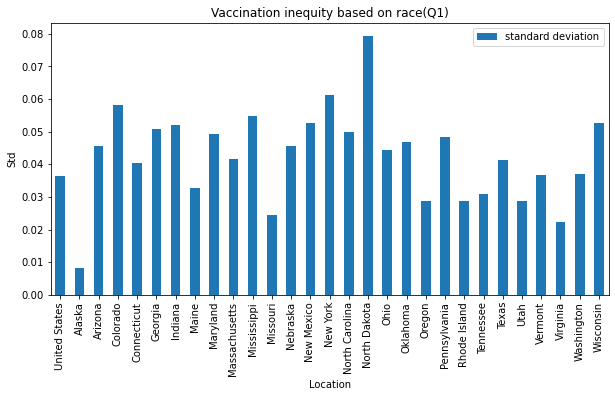

In [386]:
df_all_race_1.plot(x="Location",y="standard deviation",kind ='bar'
                   ,ylabel = "Std", title = "Vaccination inequity based on race(Q1)"
                  ,figsize = (10,5))
plt.show()

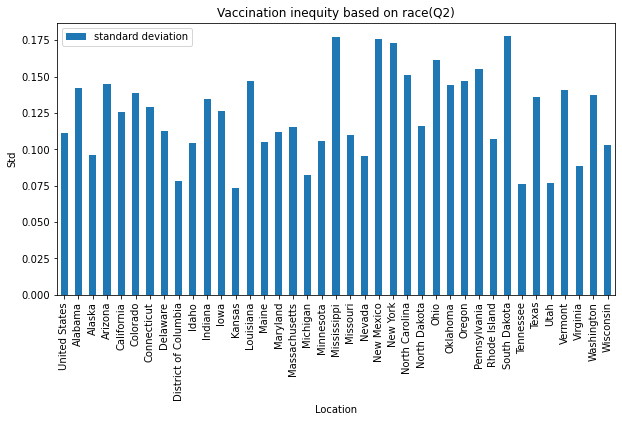

In [387]:
df_all_race_2 = df_all_race[df_all_race['quarter'] == "2"]
df_all_race_2 = df_all_race_2.drop(df_all_race_2.columns[[1,2,3,4,5]], axis=1)
df_all_race_2.plot(x="Location",y="standard deviation",kind ='bar'
                   ,ylabel = "Std", title = "Vaccination inequity based on race(Q2)"
                  ,figsize = (10,5))
plt.show()

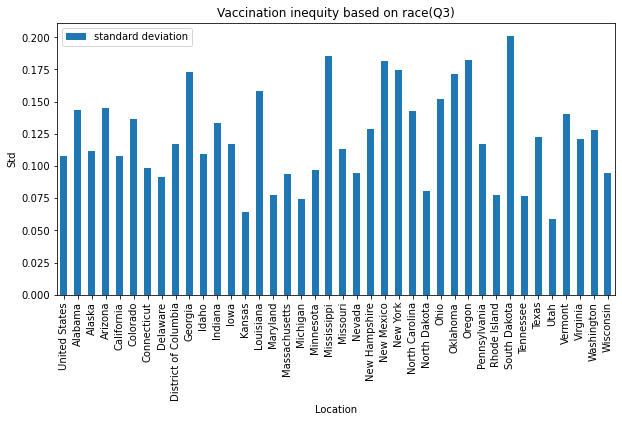

In [388]:
df_all_race_3 = df_all_race[df_all_race['quarter'] == "3"]
df_all_race_3 = df_all_race_3.drop(df_all_race_3.columns[[1,2,3,4,5]], axis=1)
df_all_race_3.plot(x="Location",y="standard deviation",kind ='bar'
                   ,ylabel = "Std", title = "Vaccination inequity based on race(Q3)"
                  ,figsize = (10,5))
plt.show()

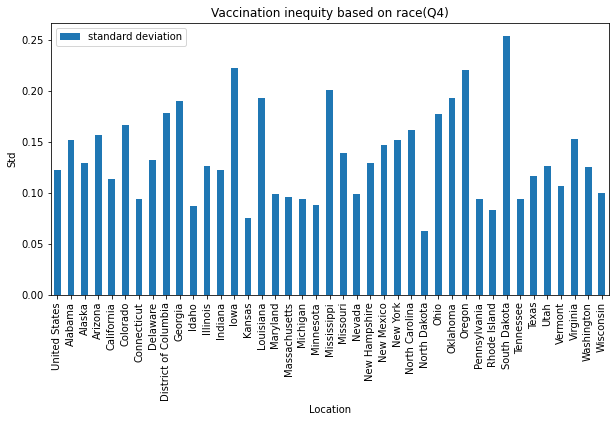

In [389]:
df_all_race_4 = df_all_race[df_all_race['quarter'] == "4"]
df_all_race_4 = df_all_race_4.drop(df_all_race_4.columns[[1,2,3,4,5]], axis=1)
df_all_race_4.plot(x="Location",y="standard deviation",kind ='bar'
                   ,ylabel = "Std", title = "Vaccination inequity based on race(Q4)"
                  ,figsize = (10,5))
plt.show()

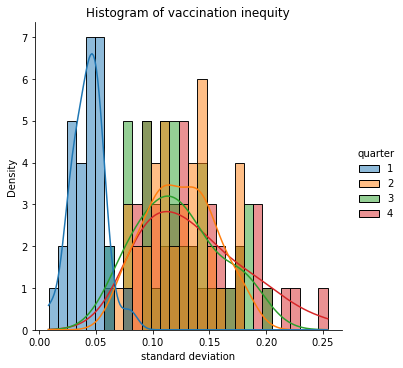

In [390]:
sns.displot(df_all_race,x = "standard deviation", kde = True, hue = "quarter", bins = 30)
plt.title('Histogram of vaccination inequity')
plt.ylabel('Density')
f1 = plt.gcf()

This graph shows the density plot for the standard deviation in the states in united states for different quarter. As we can see from the graph. As the time pass, the standard deviation for certain states gets more and more larger, meaning some states' vaccination inequity become more and more serious.

Let's look at the outliers of this data set.

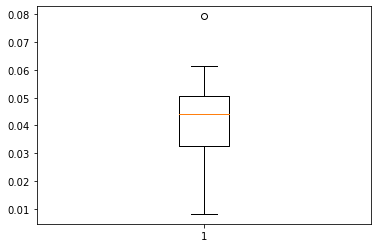

<Figure size 720x504 with 0 Axes>

The outlier for first quarter for the vaccination inequity of races is:  North Dakota. The number is  0.07932002689527197


In [391]:
plt.boxplot(df_all_race_1["standard deviation"])
fig_1 = plt.figure(figsize =(10, 7))
plt.show()
outlier =df_all_race_1[df_all_race_1["standard deviation"] >0.07].iloc[0,0]
outlier_num =df_all_race_1[df_all_race_1["standard deviation"] >0.07].iloc[0,1]
print("The outlier for first quarter for the vaccination inequity of races is: "
      , outlier +". The number is ", outlier_num)

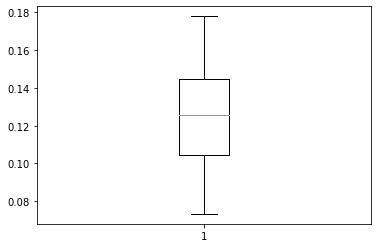

<Figure size 720x504 with 0 Axes>

In [392]:
plt.boxplot(df_all_race_2["standard deviation"])
fig_2 = plt.figure(figsize =(10, 7))
plt.show()

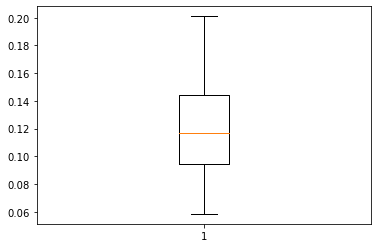

<Figure size 720x504 with 0 Axes>

In [393]:
plt.boxplot(df_all_race_3["standard deviation"])
fig_3 = plt.figure(figsize =(10, 7))
plt.show()

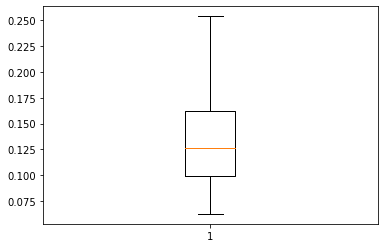

<Figure size 720x504 with 0 Axes>

In [394]:
plt.boxplot(df_all_race_4["standard deviation"])
fig_4 = plt.figure(figsize =(10, 7))
plt.show()

For other three quarters, there are no outliers.

### Unemployment Rate

In [395]:
unemployment_quarter.dtypes

State     object
19_Q1    float64
19_Q2    float64
19_Q3    float64
19_Q4    float64
20_Q1    float64
20_Q2    float64
20_Q3    float64
20_Q4    float64
21_Q1    float64
21_Q2    float64
21_Q3    float64
21_Q4    float64
dtype: object

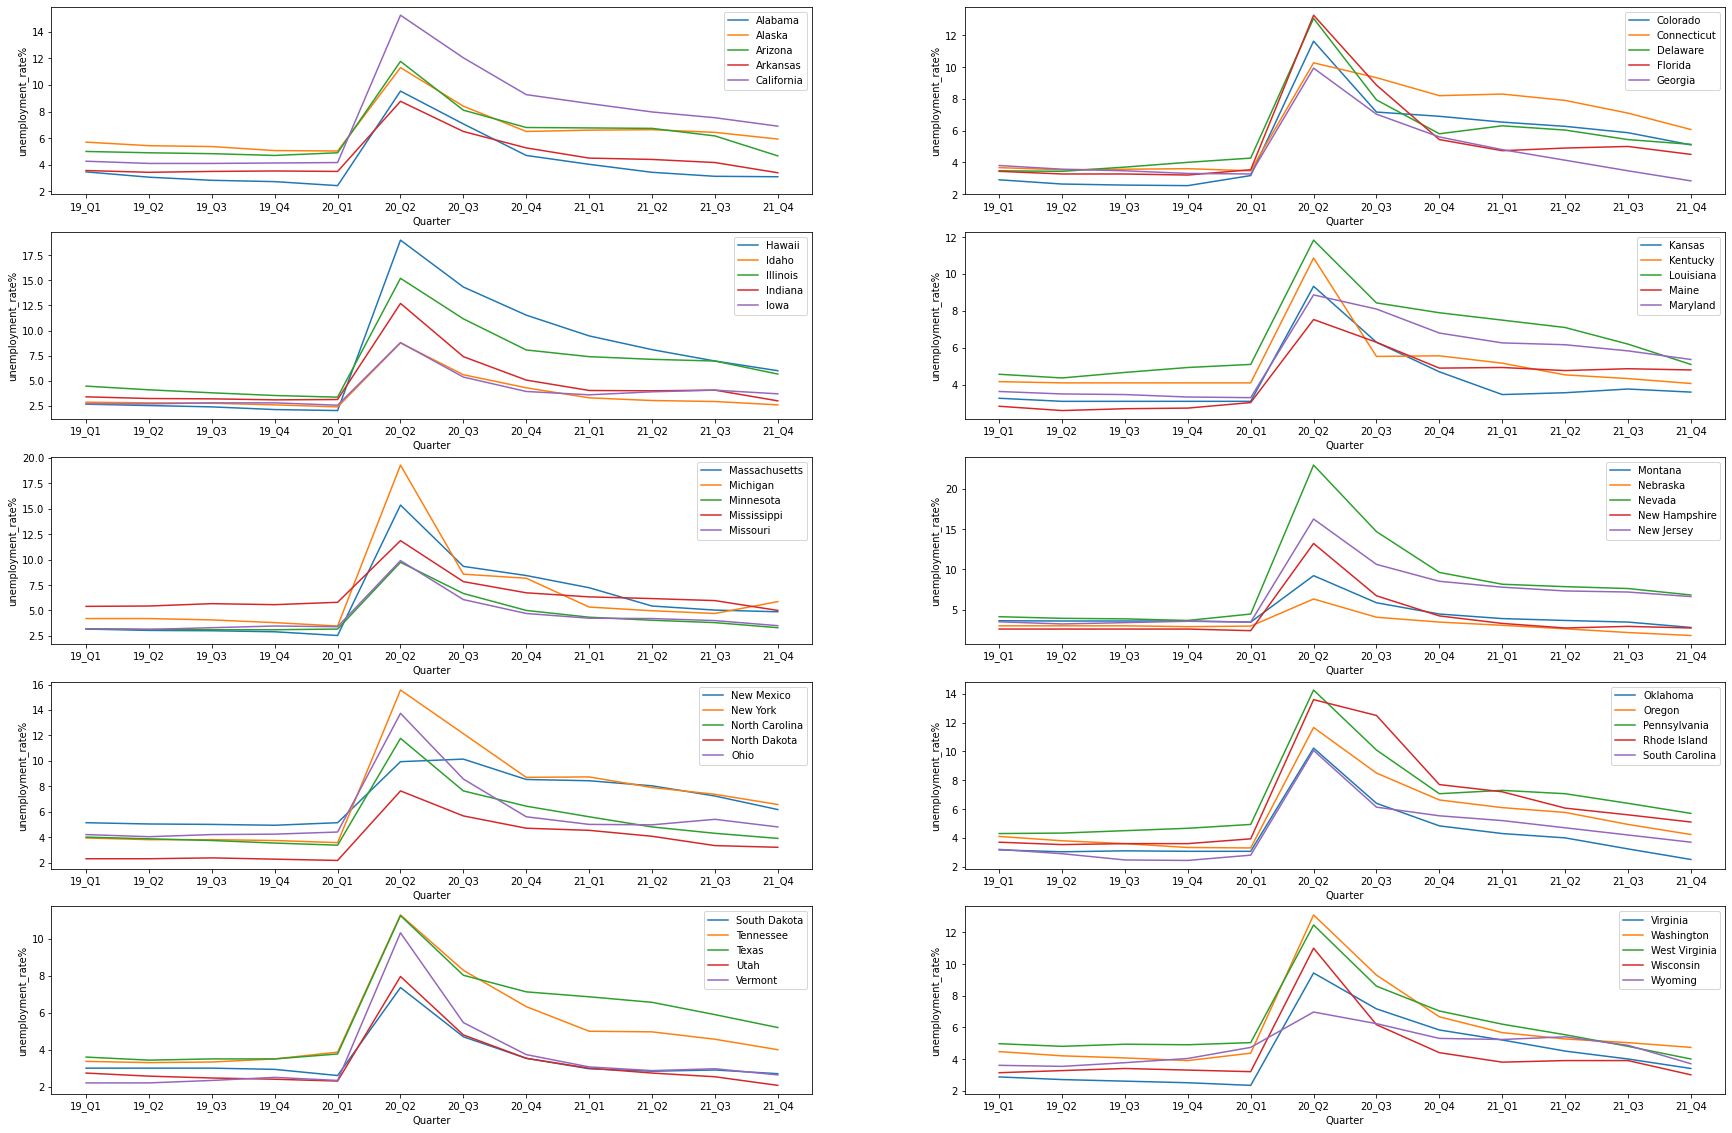

In [396]:
##Plot the quarterly unemployment rate change for 50 States in the last three years.
plt.figure(figsize=(30,20))
#Convert the original wide-form dataframe into long-form dataframe
unemployment_merge = pd.melt(unemployment_quarter,id_vars=['State'],value_vars=['19_Q1','19_Q2','19_Q3','19_Q4','20_Q1','20_Q2','20_Q3','20_Q4','21_Q1','21_Q2','21_Q3','21_Q4'],var_name='Quarter',value_name='unemployment_rate%')
#Group the states by 10 groups to separate them into subplots and make the plots tidier.
groups = {x : [] for x in range(1, 11)}
group_num = 1
for state in list(unemployment_merge["State"].loc[unemployment_merge["Quarter"] == '19_Q1']):
    groups[group_num].append(state)
    if len(groups[group_num]) >= 5:
        group_num += 1
#draw the lineplots to show the periodic change of the unemployment rates of each states.
for i in range(1,11):
    ax=plt.subplot(5,2,i)
    plot1=sns.lineplot(x = "Quarter", y = "unemployment_rate%", ax = ax, hue = "State", data = unemployment_merge.loc[unemployment_merge["State"].isin(groups[i])]) 
    plot1.legend(loc='upper right')
plt.show()

We can see from the plots that all the states showed a highest unemployment rate in the second quarter of 2020. When we compare the GDP fluctation plots above, we can easily notice that it corresponds to the lowest points of the state GDP. All the states showed a stable low unemployment rate in 2019, while the rate began to dramatically increase in the first quarter of 2020 to the peaks in second quarter of 2020. The unemployment rate then started to decline, from the second quarter of 2020 to the fourth quarter of 2021.

In [397]:
#Create new columns to store the yearly means of each state
unemployment_quarter["19_mean"]=(unemployment_quarter['19_Q1']+unemployment_month['19_Q2']+unemployment_month['19_Q3']+unemployment_month['19_Q4'])/3
unemployment_quarter["20_mean"]=(unemployment_quarter['20_Q1']+unemployment_month['20_Q2']+unemployment_month['20_Q3']+unemployment_month['20_Q4'])/3
unemployment_quarter["21_mean"]=(unemployment_quarter['21_Q1']+unemployment_month['21_Q2']+unemployment_month['21_Q3']+unemployment_month['21_Q4'])/3
unemployment_quarter.head()

,State,19_Q1,19_Q2,19_Q3,19_Q4,20_Q1,20_Q2,20_Q3,20_Q4,21_Q1,21_Q2,21_Q3,21_Q4,19_mean,20_mean,21_mean
0,Alabama,3.466667,3.066667,2.833333,2.733333,2.433333,9.533333,7.066667,4.700000,4.033333,3.433333,3.133333,3.100000,4.033333,7.911111,4.566667
1,Alaska,5.700000,5.433333,5.366667,5.066667,5.033333,11.300000,8.400000,6.500000,6.600000,6.633333,6.433333,5.933333,7.188889,10.411111,8.533333
2,Arizona,5.000000,4.900000,4.833333,4.700000,4.900000,11.766667,8.100000,6.800000,6.766667,6.733333,6.166667,4.666667,6.477778,10.522222,8.111111
3,Arkansas,3.566667,3.433333,3.500000,3.533333,3.500000,8.766667,6.500000,5.266667,4.500000,4.400000,4.166667,3.400000,4.677778,8.011111,5.488889
4,California,4.266667,4.100000,4.100000,4.133333,4.166667,15.233333,12.033333,9.266667,8.600000,7.966667,7.533333,6.900000,5.533333,13.566667,10.333333


In [398]:
#Calculate the yearly median to serve as lines of indicator.
yearly_median = []
for i in range(-3,0):
    yearly_median.append(unemployment_quarter.iloc[:,i].median())
yearly_median

[4.661111111111111, 9.677777777777777, 6.427777777777779]

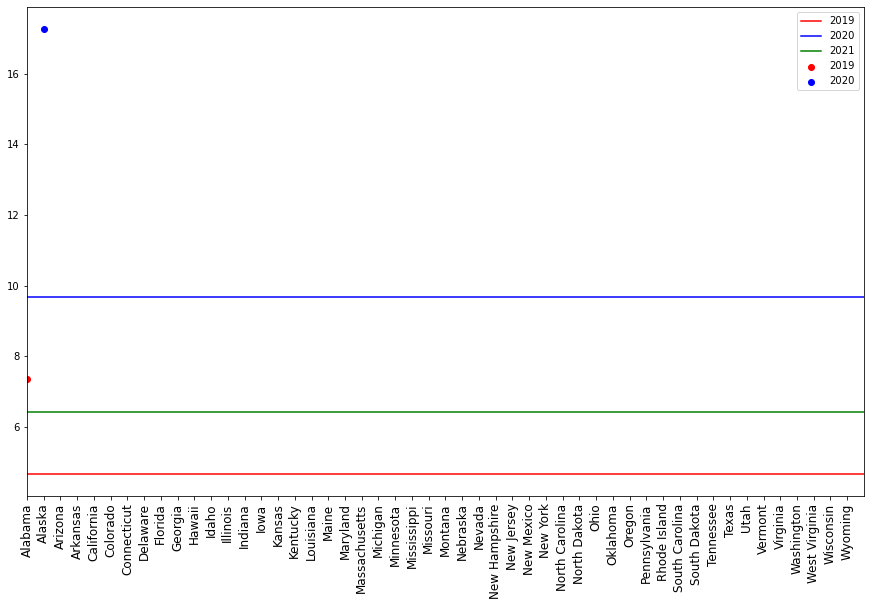

The outlier of the state unemployment rate in 2019 is Alabama. The number is 7.355555555555557
The outlier of the state unemployment rate in 2020 is Alaska . The number is 17.255555555555556
There is no outlier of the state unemployment rate in 2021.


In [399]:
#Function definition to detect outliers.
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = []
    for i in sr:
        if (i < fence_low) | (i > fence_high):
            outliers.append(i)
    return outliers

#Plot definition to show the existing outliers.
plt.figure(figsize=(15,9))
x=list(range(0,50))
x_label=unemployment_quarter['State']
plt.xlim(0,50)
y = np.arange(20)
plt.xticks(x,x_label,rotation=90,size=12)

# Draw outlier points
outlier_lst1 = detect_outliers(unemployment_quarter["19_mean"])
outlier_lst2 = detect_outliers(unemployment_quarter["20_mean"])
outlier_lst3 = detect_outliers(unemployment_quarter["21_mean"])
for i in outlier_lst1:
    plt.scatter(unemployment_quarter["State"][unemployment_quarter["19_mean"]==i],i,color='red',label='2019')
for i in outlier_lst2:
    plt.scatter(unemployment_quarter["State"][unemployment_quarter["20_mean"]==i],i,color='blue',label='2020')
for i in outlier_lst3:
    plt.scatter(unemployment_quarter["State"][unemployment_quarter["21_mean"]==i],i,color='green',label='2021')

#Draw lines of yearly median
plt.axhline(y=yearly_median[0], color='red' , linestyle='-',label='2019')
plt.axhline(y=yearly_median[1], color='blue' , linestyle='-',label='2020')
plt.axhline(y=yearly_median[2], color='green' , linestyle='-',label='2021')

plt.legend(loc='upper right')
plt.show()

print("The outlier of the state unemployment rate in 2019 is Alabama. The number is "+ str(outlier_lst1[0]))
print("The outlier of the state unemployment rate in 2020 is Alaska . The number is "+ str(outlier_lst2[0]))
print("There is no outlier of the state unemployment rate in 2021.")

From the plot, we can see that the relationship between vaccination inequity of different race doesn't have strong correlation with the state's unemplyment. Especially for quarter 3 and 4, as the standard deviation of equity increases, the gdp almost stays the same.

### Relationship Analysis (GDP vs Standard Deviation of Races)

In [400]:
stategdp_trans = stategdp1.transpose()
stategdp_trans.head()
stategdp_trans = stategdp_trans.reset_index()

In [401]:
stategdp_trans = stategdp_trans.rename(columns={'State': 'Location'})
stategdp_trans.head()

,Location,2019Q2_acc,2019Q3_acc,2019Q4_acc,2020Q1_acc,2020Q2_acc,2020Q3_acc,2020Q4_acc,2021Q1_acc,2021Q2_acc,2021Q3_acc
0,Connecticut,0.004204,0.006443,0.007660,-0.008032,-0.088984,0.079529,0.018766,-0.013190,0.029753,0.017088
1,Maine,0.005865,0.016629,0.011985,-0.009654,-0.099870,0.091599,0.010577,0.078642,0.027879,0.019278
2,Massachusetts,0.010202,0.010491,0.004438,-0.004095,-0.090212,0.080068,0.013984,0.020279,0.030899,0.019804
3,New Hampshire,0.000057,0.005690,0.001992,0.001261,-0.107063,0.096936,0.011365,0.062463,0.064612,0.002876
4,Rhode Island,0.002888,-0.000582,0.009163,-0.006112,-0.091503,0.085209,0.008137,0.012375,0.053898,0.018174


In [402]:
stategdp_q1 = stategdp_trans
stategdp_q1 = stategdp_q1.drop(stategdp_q1.columns[[1,2,3,4,5,6,7,9,10]], axis=1)
stategdp_q1 = stategdp_q1.rename(columns={'2021Q1_acc': 'gdp'})


In [403]:
def standardize_location(string):
    string = string.lower()
    string = string.strip()
    string = string.replace(" ", " ")
    string = string.strip()
    return string

In [404]:
stategdp_q1["Location"] = stategdp_q1["Location"].apply(standardize_location)
df_all_race_1["Location"] = df_all_race_1["Location"].apply(standardize_location)
gdp_race_q1 = pd.merge(stategdp_q1, df_all_race_1, how="left", on="Location")
gdp_race_q1 = gdp_race_q1.dropna(how ='any')
Q1 = {'quarter':1}
gdp_race_q1 = pd.concat([gdp_race_q1, pd.DataFrame(Q1, gdp_race_q1.index)], axis=1)
gdp_race_q1.head()

,Location,gdp,standard deviation,quarter
0,connecticut,-0.013190,0.040311,1
1,maine,0.078642,0.032660,1
2,massachusetts,0.020279,0.041633,1
4,rhode island,0.012375,0.028723,1
5,vermont,0.038970,0.036856,1


In [405]:
stategdp_q2 = stategdp_trans
stategdp_q2 = stategdp_q2.drop(stategdp_q2.columns[[1,2,3,4,5,6,7,8,10]], axis=1)
stategdp_q2 = stategdp_q2.rename(columns={'2021Q2_acc': 'gdp'})


In [406]:
stategdp_q2["Location"] = stategdp_q2["Location"].apply(standardize_location)
df_all_race_2["Location"] = df_all_race_2["Location"].apply(standardize_location)
gdp_race_q2 = pd.merge(stategdp_q2, df_all_race_2, how="left", on="Location")
gdp_race_q2 = gdp_race_q2.dropna(how ='any')
Q2 = {'quarter':2}
gdp_race_q2 = pd.concat([gdp_race_q2, pd.DataFrame(Q2, gdp_race_q2.index)], axis=1)
gdp_race_q2.head()

,Location,gdp,standard deviation,quarter
0,connecticut,0.029753,0.129228,2
1,maine,0.027879,0.105040,2
2,massachusetts,0.030899,0.115578,2
4,rhode island,0.053898,0.107199,2
5,vermont,0.019154,0.140801,2


In [407]:
stategdp_q3 = stategdp_trans
stategdp_q3 = stategdp_q3.drop(stategdp_q3.columns[[1,2,3,4,5,6,7,8,9]], axis=1)
stategdp_q3 = stategdp_q3.rename(columns={'2021Q3_acc': 'gdp'})
stategdp_q3["Location"] = stategdp_q3["Location"].apply(standardize_location)
df_all_race_3["Location"] = df_all_race_3["Location"].apply(standardize_location)
gdp_race_q3 = pd.merge(stategdp_q3, df_all_race_3, how="left", on="Location")
gdp_race_q3 = gdp_race_q3.dropna(how ='any')
Q3 = {'quarter':3}
gdp_race_q3 = pd.concat([gdp_race_q3, pd.DataFrame(Q3, gdp_race_q3.index)], axis=1)
gdp_race_q3.head()

,Location,gdp,standard deviation,quarter
0,connecticut,0.017088,0.098826,3
2,massachusetts,0.019804,0.093452,3
3,new hampshire,0.002876,0.128841,3
4,rhode island,0.018174,0.077889,3
5,vermont,0.016777,0.140327,3


In [408]:
gdp_race = pd.concat([gdp_race_q1,gdp_race_q2,gdp_race_q3])

Text(0.5, 1.0, 'gdp vs std')

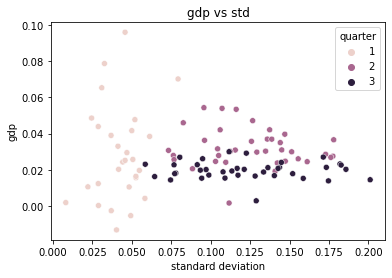

In [409]:
sns.scatterplot(x = "standard deviation", y = "gdp", hue = "quarter", data = gdp_race)
plt.title('gdp vs std')

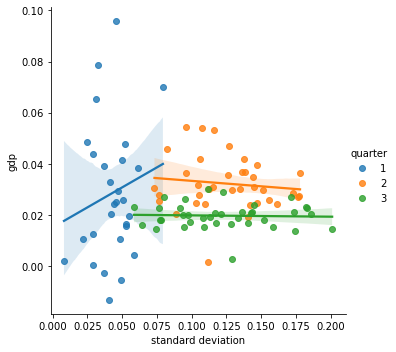

In [410]:
sns.lmplot(x = "standard deviation", y = "gdp",hue = "quarter" ,data = gdp_race)

From the plot, we can see that the relationship between vaccination inequity of different race doesn't have strong correlation with the state's gdp. Especially for quarter 2 and 3, as the standard deviation of equity increases, the gdp almost stays the same.

### Relationship Analysis (Unemployment Rate VS Standard Deviation of Races)

In [411]:
unemployment_quarter.head()

,State,19_Q1,19_Q2,19_Q3,19_Q4,20_Q1,20_Q2,20_Q3,20_Q4,21_Q1,21_Q2,21_Q3,21_Q4,19_mean,20_mean,21_mean
0,Alabama,3.466667,3.066667,2.833333,2.733333,2.433333,9.533333,7.066667,4.700000,4.033333,3.433333,3.133333,3.100000,4.033333,7.911111,4.566667
1,Alaska,5.700000,5.433333,5.366667,5.066667,5.033333,11.300000,8.400000,6.500000,6.600000,6.633333,6.433333,5.933333,7.188889,10.411111,8.533333
2,Arizona,5.000000,4.900000,4.833333,4.700000,4.900000,11.766667,8.100000,6.800000,6.766667,6.733333,6.166667,4.666667,6.477778,10.522222,8.111111
3,Arkansas,3.566667,3.433333,3.500000,3.533333,3.500000,8.766667,6.500000,5.266667,4.500000,4.400000,4.166667,3.400000,4.677778,8.011111,5.488889
4,California,4.266667,4.100000,4.100000,4.133333,4.166667,15.233333,12.033333,9.266667,8.600000,7.966667,7.533333,6.900000,5.533333,13.566667,10.333333


In [412]:
unemployment_all = unemployment_quarter.rename(columns={'State': 'Location'})
unemployment_all.head()

,Location,19_Q1,19_Q2,19_Q3,19_Q4,20_Q1,20_Q2,20_Q3,20_Q4,21_Q1,21_Q2,21_Q3,21_Q4,19_mean,20_mean,21_mean
0,Alabama,3.466667,3.066667,2.833333,2.733333,2.433333,9.533333,7.066667,4.700000,4.033333,3.433333,3.133333,3.100000,4.033333,7.911111,4.566667
1,Alaska,5.700000,5.433333,5.366667,5.066667,5.033333,11.300000,8.400000,6.500000,6.600000,6.633333,6.433333,5.933333,7.188889,10.411111,8.533333
2,Arizona,5.000000,4.900000,4.833333,4.700000,4.900000,11.766667,8.100000,6.800000,6.766667,6.733333,6.166667,4.666667,6.477778,10.522222,8.111111
3,Arkansas,3.566667,3.433333,3.500000,3.533333,3.500000,8.766667,6.500000,5.266667,4.500000,4.400000,4.166667,3.400000,4.677778,8.011111,5.488889
4,California,4.266667,4.100000,4.100000,4.133333,4.166667,15.233333,12.033333,9.266667,8.600000,7.966667,7.533333,6.900000,5.533333,13.566667,10.333333


In [413]:
unemployment_q1 = unemployment_all
unemployment_q1  = unemployment_q1.drop(unemployment_q1.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15]], axis=1)
unemployment_q1  = unemployment_q1.rename(columns={'21_Q1': 'unemployment'})

In [414]:
unemployment_q1["Location"] = unemployment_q1["Location"].apply(standardize_location)
df_all_race_1["Location"] = df_all_race_1["Location"].apply(standardize_location)
unemployment_q1 = pd.merge(unemployment_q1, df_all_race_1, how="left", on="Location")
unemployment_q1 = unemployment_q1.dropna(how ='any')
Q1 = {'quarter':1}
unemployment_q1 = pd.concat([unemployment_q1, pd.DataFrame(Q1, unemployment_q1.index)], axis=1)
unemployment_q1.head()

,Location,unemployment,standard deviation,quarter
1,alaska,6.600000,0.008165,1
2,arizona,6.766667,0.045735,1
5,colorado,6.533333,0.058310,1
6,connecticut,8.300000,0.040311,1
9,georgia,4.800000,0.050662,1


In [415]:
unemployment_q2 = unemployment_all
unemployment_q2  = unemployment_q2.drop(unemployment_q2.columns[[1,2,3,4,5,6,7,8,9,11,12,13,14,15]], axis=1)
unemployment_q2  = unemployment_q2.rename(columns={'21_Q2': 'unemployment'})
unemployment_q2["Location"] = unemployment_q2["Location"].apply(standardize_location)
df_all_race_2["Location"] = df_all_race_2["Location"].apply(standardize_location)
unemployment_q2 = pd.merge(unemployment_q2, df_all_race_2, how="left", on="Location")
unemployment_q2 = unemployment_q2.dropna(how ='any')
Q2 = {'quarter':2}
unemployment_q2 = pd.concat([unemployment_q2, pd.DataFrame(Q2, unemployment_q2.index)], axis=1)
unemployment_q2.head()

,Location,unemployment,standard deviation,quarter
0,alabama,3.433333,0.142215,2
1,alaska,6.633333,0.096090,2
2,arizona,6.733333,0.145000,2
4,california,7.966667,0.125831,2
5,colorado,6.266667,0.138684,2


In [416]:
unemployment_q3 = unemployment_all
unemployment_q3  = unemployment_q3.drop(unemployment_q3.columns[[1,2,3,4,5,6,7,8,9,10,12,13,14,15]], axis=1)
unemployment_q3  = unemployment_q3.rename(columns={'21_Q3': 'unemployment'})
unemployment_q3["Location"] = unemployment_q3["Location"].apply(standardize_location)
df_all_race_3["Location"] = df_all_race_3["Location"].apply(standardize_location)
unemployment_q3 = pd.merge(unemployment_q3, df_all_race_3, how="left", on="Location")
unemployment_q3 = unemployment_q3.dropna(how ='any')
Q3 = {'quarter':3}
unemployment_q3 = pd.concat([unemployment_q3, pd.DataFrame(Q3, unemployment_q3.index)], axis=1)
unemployment_q3.head()

,Location,unemployment,standard deviation,quarter
0,alabama,3.133333,0.143643,3
1,alaska,6.433333,0.111654,3
2,arizona,6.166667,0.144770,3
4,california,7.533333,0.107819,3
5,colorado,5.866667,0.136260,3


In [417]:
unemployment_q4 = unemployment_all
unemployment_q4  = unemployment_q4.drop(unemployment_q4.columns[[1,2,3,4,5,6,7,8,9,10,11,13,14,15]], axis=1)
unemployment_q4  = unemployment_q4.rename(columns={'21_Q4': 'unemployment'})
unemployment_q4["Location"] = unemployment_q4["Location"].apply(standardize_location)
df_all_race_4["Location"] = df_all_race_4["Location"].apply(standardize_location)
unemployment_q4 = pd.merge(unemployment_q4, df_all_race_4, how="left", on="Location")
unemployment_q4 = unemployment_q4.dropna(how ='any')
Q4 = {'quarter':4}
unemployment_q4 = pd.concat([unemployment_q4, pd.DataFrame(Q4, unemployment_q4.index)], axis=1)
unemployment_q4.head()

,Location,unemployment,standard deviation,quarter
0,alabama,3.100000,0.152179,4
1,alaska,5.933333,0.129711,4
2,arizona,4.666667,0.156418,4
4,california,6.900000,0.113871,4
5,colorado,5.100000,0.166633,4


Text(0.5, 1.0, 'unemployment vs std')

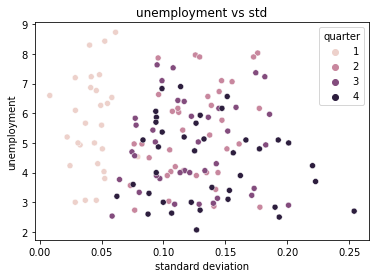

In [418]:
unemployment_race = pd.concat([unemployment_q1,unemployment_q2,unemployment_q3,unemployment_q4])
sns.scatterplot(x = "standard deviation", y = "unemployment", hue = "quarter", data = unemployment_race)
plt.title('unemployment vs std')

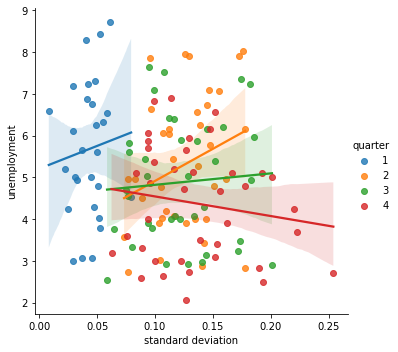

In [419]:
sns.lmplot(x = "standard deviation", y = "unemployment",hue = "quarter" ,data = unemployment_race)

From the plot, we can see that the  vaccination inequity of different race does seem to have a positive correlation with the state's unemplyment in Q1, Q2 and Q3. However, for Q4, as the standard deviation of equity increases, the unemployment rate decreases.

In [420]:
gdp_race = gdp_race.rename(columns={'standard deviation': 'standard_deviation'})

In [421]:
unemployment_race = unemployment_race.rename(columns={'standard deviation': 'standard_deviation'})

In [422]:
out_val_1, pred_val_1 = patsy.dmatrices('gdp ~ standard_deviation', gdp_race)
mod_val_1 = sm.OLS(out_val_1, pred_val_1)
res_val_1 = mod_val_1.fit()
print(res_val_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.643
Time:                        23:35:07   Log-Likelihood:                 279.04
No. Observations:                 103   AIC:                            -554.1
Df Residuals:                     101   BIC:                            -548.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0282      0

In [423]:
out_val_2, pred_val_2 = patsy.dmatrices(' unemployment~ standard_deviation', unemployment_race)
mod_val_2 = sm.OLS(out_val_2, pred_val_2)
res_val_2 = mod_val_2.fit()
print(res_val_2.summary())

                            OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.584
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.110
Time:                        23:35:07   Log-Likelihood:                -264.04
No. Observations:                 142   AIC:                             532.1
Df Residuals:                     140   BIC:                             538.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4963      0

From the two regression results we have, it looks like the inequality of vaccination between race is not a reliable predictor for the state's economic, and especially for its gdp. But we can still see a negative relationship between the standard_deviation and economic, which means that the increase of standard_deviation of the vaccination inequity between different races decrease the gdp and also decrease the unemployment rate. The r-squared value shows the limited relationship between the inequity and unemployment and gdp. The presence of confounders not accounted for in this study is also a fact that lowers the confidence of the results.

### Relationship Analysis (GDP vs Vaccinated Rate by Age)

In [424]:
afullyVaccineRate_age['State'] = fullyVaccineRate_age['State']
afullyVaccineRate_age.columns = ['5-11', '12-17', '18-64', '65+', 'Location']
afullyVaccineRate_age.head()

,5-11,12-17,18-64,65+,Location
0,0.077,0.329,0.536,0.854,Alabama
1,0.201,0.537,0.668,0.941,Alaska
2,0.185,0.539,0.663,0.918,Arizona
3,0.137,0.444,0.579,0.833,Arkansas
4,0.288,0.689,0.775,0.941,California


In [425]:
afullyVaccineRate_age["Location"] = afullyVaccineRate_age["Location"].apply(standardize_location)
gdp_age1_511 = pd.merge(stategdp_q1, pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
gdp_age1_511.columns = ['Location', 'gdp', 'VacRate']
gdp_age1_511['AgeGroup'] = '5-11'
gdp_age1_511['Q'] = '1'
gdp_age1_511.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,-0.013190,0.350,5-11,1
1,maine,0.078642,0.379,5-11,1
2,massachusetts,0.020279,0.432,5-11,1
3,new hampshire,0.062463,0.241,5-11,1
4,rhode island,0.012375,0.423,5-11,1


In [426]:
gdp_age2_511 = pd.merge(stategdp_q2, pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
gdp_age2_511.columns = ['Location', 'gdp', 'VacRate']
gdp_age2_511['AgeGroup'] = '5-11'
gdp_age2_511['Q'] = '2'
gdp_age2_511.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.029753,0.350,5-11,2
1,maine,0.027879,0.379,5-11,2
2,massachusetts,0.030899,0.432,5-11,2
3,new hampshire,0.064612,0.241,5-11,2
4,rhode island,0.053898,0.423,5-11,2


In [427]:
gdp_age3_511 = pd.merge(stategdp_q3, pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
gdp_age3_511.columns = ['Location', 'gdp', 'VacRate']
gdp_age3_511['AgeGroup'] = '5-11'
gdp_age3_511['Q'] = '3'
gdp_age3_511.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.017088,0.350,5-11,3
1,maine,0.019278,0.379,5-11,3
2,massachusetts,0.019804,0.432,5-11,3
3,new hampshire,0.002876,0.241,5-11,3
4,rhode island,0.018174,0.423,5-11,3


In [428]:
gdp_age511 = pd.concat([gdp_age1_511,gdp_age2_511,gdp_age3_511])

In [429]:
gdp_age1_17 = pd.merge(stategdp_q1, pd.DataFrame(afullyVaccineRate_age[['12-17','Location']]), how="left", on="Location")
gdp_age1_17.columns = ['Location', 'gdp', 'VacRate']
gdp_age1_17['AgeGroup'] = '12-17'
gdp_age1_17['Q'] = '1'
gdp_age1_17.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,-0.013190,0.732,12-17,1
1,maine,0.078642,0.672,12-17,1
2,massachusetts,0.020279,0.749,12-17,1
3,new hampshire,0.062463,0.583,12-17,1
4,rhode island,0.012375,0.777,12-17,1


In [430]:
gdp_age2_17 = pd.merge(stategdp_q2, pd.DataFrame(afullyVaccineRate_age[['12-17','Location']]), how="left", on="Location")
gdp_age2_17.columns = ['Location', 'gdp', 'VacRate']
gdp_age2_17['AgeGroup'] = '12-17'
gdp_age2_17['Q'] = '2'
gdp_age2_17.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.029753,0.732,12-17,2
1,maine,0.027879,0.672,12-17,2
2,massachusetts,0.030899,0.749,12-17,2
3,new hampshire,0.064612,0.583,12-17,2
4,rhode island,0.053898,0.777,12-17,2


In [431]:
gdp_age3_17 = pd.merge(stategdp_q3, pd.DataFrame(afullyVaccineRate_age[['12-17','Location']]), how="left", on="Location")
gdp_age3_17.columns = ['Location', 'gdp', 'VacRate']
gdp_age3_17['AgeGroup'] = '12-17'
gdp_age3_17['Q'] = '3'
gdp_age3_17.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.017088,0.732,12-17,3
1,maine,0.019278,0.672,12-17,3
2,massachusetts,0.019804,0.749,12-17,3
3,new hampshire,0.002876,0.583,12-17,3
4,rhode island,0.018174,0.777,12-17,3


In [432]:
gdp_age17 = pd.concat([gdp_age1_17,gdp_age2_17,gdp_age3_17])

In [433]:
gdp_age1_64 = pd.merge(stategdp_q1, pd.DataFrame(afullyVaccineRate_age[['18-64','Location']]), how="left", on="Location")
gdp_age1_64.columns = ['Location', 'gdp', 'VacRate']
gdp_age1_64['AgeGroup'] = '18-64'
gdp_age1_64['Q'] = '1'
gdp_age1_64.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,-0.013190,0.830,18-64,1
1,maine,0.078642,0.821,18-64,1
2,massachusetts,0.020279,0.828,18-64,1
3,new hampshire,0.062463,0.733,18-64,1
4,rhode island,0.012375,0.847,18-64,1


In [434]:
gdp_age2_64 = pd.merge(stategdp_q2, pd.DataFrame(afullyVaccineRate_age[['18-64','Location']]), how="left", on="Location")
gdp_age2_64.columns = ['Location', 'gdp', 'VacRate']
gdp_age2_64['AgeGroup'] = '18-64'
gdp_age2_64['Q'] = '2'
gdp_age2_64.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.029753,0.830,18-64,2
1,maine,0.027879,0.821,18-64,2
2,massachusetts,0.030899,0.828,18-64,2
3,new hampshire,0.064612,0.733,18-64,2
4,rhode island,0.053898,0.847,18-64,2


In [435]:
gdp_age3_64 = pd.merge(stategdp_q3, pd.DataFrame(afullyVaccineRate_age[['18-64','Location']]), how="left", on="Location")
gdp_age3_64.columns = ['Location', 'gdp', 'VacRate']
gdp_age3_64['AgeGroup'] = '18-64'
gdp_age3_64['Q'] = '3'
gdp_age3_64.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.017088,0.830,18-64,3
1,maine,0.019278,0.821,18-64,3
2,massachusetts,0.019804,0.828,18-64,3
3,new hampshire,0.002876,0.733,18-64,3
4,rhode island,0.018174,0.847,18-64,3


In [436]:
gdp_age64 = pd.concat([gdp_age1_64,gdp_age2_64,gdp_age3_64])

In [437]:
gdp_age1_65 = pd.merge(stategdp_q1, pd.DataFrame(afullyVaccineRate_age[['65+','Location']]), how="left", on="Location")
gdp_age1_65.columns = ['Location', 'gdp', 'VacRate']
gdp_age1_65['AgeGroup'] = '65+'
gdp_age1_65['Q'] = '1'
gdp_age1_65.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,-0.013190,0.998,65+,1
1,maine,0.078642,0.999,65+,1
2,massachusetts,0.020279,0.987,65+,1
3,new hampshire,0.062463,0.999,65+,1
4,rhode island,0.012375,0.999,65+,1


In [438]:
gdp_age2_65 = pd.merge(stategdp_q2, pd.DataFrame(afullyVaccineRate_age[['65+','Location']]), how="left", on="Location")
gdp_age2_65.columns = ['Location', 'gdp', 'VacRate']
gdp_age2_65['AgeGroup'] = '65+'
gdp_age2_65['Q'] = '2'
gdp_age2_65.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.029753,0.998,65+,2
1,maine,0.027879,0.999,65+,2
2,massachusetts,0.030899,0.987,65+,2
3,new hampshire,0.064612,0.999,65+,2
4,rhode island,0.053898,0.999,65+,2


In [439]:
gdp_age3_65 = pd.merge(stategdp_q3, pd.DataFrame(afullyVaccineRate_age[['65+','Location']]), how="left", on="Location")
gdp_age3_65.columns = ['Location', 'gdp', 'VacRate']
gdp_age3_65['AgeGroup'] = '65+'
gdp_age3_65['Q'] = '3'
gdp_age3_65.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,0.017088,0.998,65+,3
1,maine,0.019278,0.999,65+,3
2,massachusetts,0.019804,0.987,65+,3
3,new hampshire,0.002876,0.999,65+,3
4,rhode island,0.018174,0.999,65+,3


In [440]:
gdp_age65 = pd.concat([gdp_age1_65,gdp_age2_65,gdp_age3_65])

In [441]:
gdp_age = pd.concat([gdp_age65,gdp_age64,gdp_age17,gdp_age511])
gdp_age.head()

,Location,gdp,VacRate,AgeGroup,Q
0,connecticut,-0.013190,0.998,65+,1
1,maine,0.078642,0.999,65+,1
2,massachusetts,0.020279,0.987,65+,1
3,new hampshire,0.062463,0.999,65+,1
4,rhode island,0.012375,0.999,65+,1


Text(0.5, 0, 'VacRate 65+')

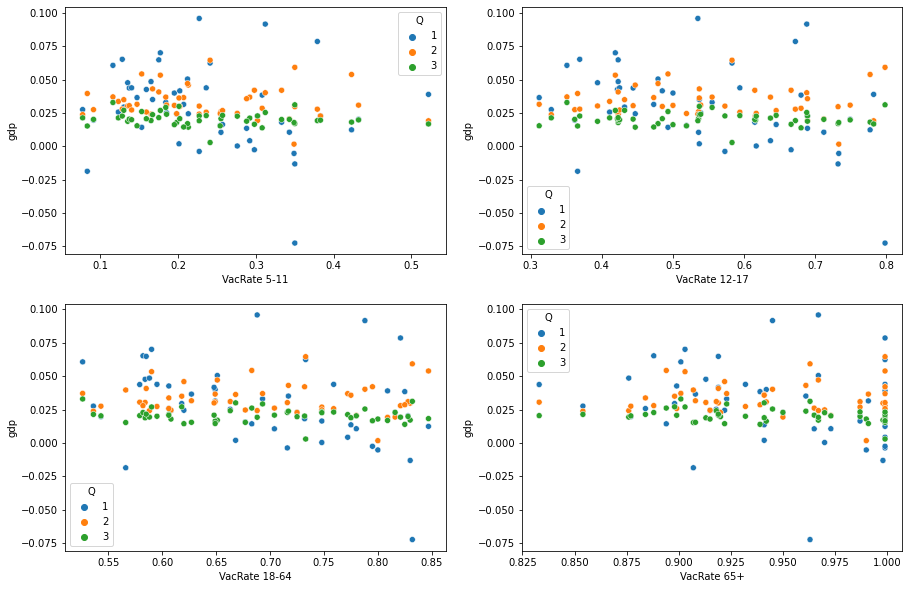

In [442]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '5-11'], ax = axes[0,0])
sns.scatterplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '12-17'], ax = axes[0,1])
sns.scatterplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '18-64'], ax = axes[1,0])
sns.scatterplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '65+'], ax = axes[1,1])
axes[0,0].set_xlabel('VacRate 5-11')
axes[0,1].set_xlabel('VacRate 12-17')
axes[1,0].set_xlabel('VacRate 18-64')
axes[1,1].set_xlabel('VacRate 65+')

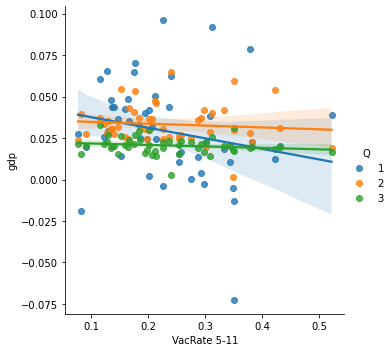

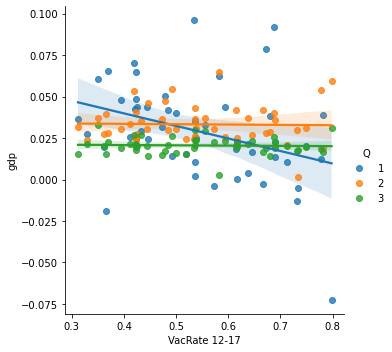

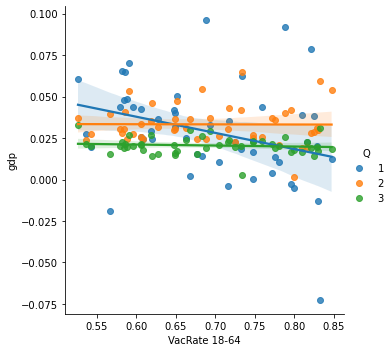

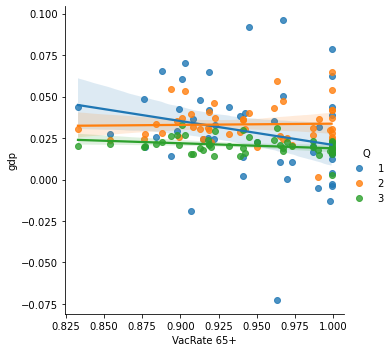

In [443]:
p1 = sns.lmplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '5-11'])
p2 = sns.lmplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '12-17'])
p3 = sns.lmplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '18-64'])
p4 = sns.lmplot(x = "VacRate", y = "gdp", hue = "Q", data = gdp_age[gdp_age['AgeGroup'] == '65+'])
p1.set_xlabels('VacRate 5-11')
p2.set_xlabels('VacRate 12-17')
p3.set_xlabels('VacRate 18-64')
p4.set_xlabels('VacRate 65+')

We could see no obvious correlation between vaccination rate for each ages and state gdp percent change especially in Q2 and Q3. However, we can see from the above plots that there is a weird negative relationship between vaccination rate in all age ranges and state gdp percent change in Q1.

### Relationship Analysis (Change in Unemployment Rate vs Vaccinated Rate by Age)

In [444]:
unemployment_q1 = unemployment_all
unemployment_q1  = unemployment_q1.drop(unemployment_q1.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15]], axis=1)
unemployment_q1  = unemployment_q1.rename(columns={'21_Q1': 'unemployment'})

unemployment_q2 = unemployment_all
unemployment_q2  = unemployment_q2.drop(unemployment_q2.columns[[1,2,3,4,5,6,7,8,9,11,12,13,14,15]], axis=1)
unemployment_q2  = unemployment_q2.rename(columns={'21_Q2': 'unemployment'})

unemployment_q3 = unemployment_all
unemployment_q3  = unemployment_q3.drop(unemployment_q3.columns[[1,2,3,4,5,6,7,8,9,10,12,13,14,15]], axis=1)
unemployment_q3  = unemployment_q3.rename(columns={'21_Q3': 'unemployment'})

unemployment_q4 = unemployment_all
unemployment_q4  = unemployment_q4.drop(unemployment_q4.columns[[1,2,3,4,5,6,7,8,9,10,11,13,14,15]], axis=1)
unemployment_q4  = unemployment_q4.rename(columns={'21_Q4': 'unemployment'})

unemployment_q1["Location"] = unemployment_q1["Location"].apply(standardize_location)
unemployment_q2["Location"] = unemployment_q2["Location"].apply(standardize_location)
unemployment_q3["Location"] = unemployment_q3["Location"].apply(standardize_location)
unemployment_q4["Location"] = unemployment_q4["Location"].apply(standardize_location)

unemployment_q1['unemployment'] = unemployment_q2['unemployment'] - unemployment_q1['unemployment']
unemployment_q2['unemployment'] = unemployment_q3['unemployment'] - unemployment_q2['unemployment']
unemployment_q3['unemployment'] = unemployment_q4['unemployment'] - unemployment_q3['unemployment']

In [445]:
un_age1_511 = pd.merge(pd.DataFrame(unemployment_q1[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age1_511.columns = ['Location', 'Unemployment','VacRate']
un_age1_511['AgeGroup'] = '5-11'
un_age1_511['Q'] = '1'
un_age1_511.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.600000,0.077,5-11,1
1,alaska,0.033333,0.201,5-11,1
2,arizona,-0.033333,0.185,5-11,1
3,arkansas,-0.100000,0.137,5-11,1
4,california,-0.633333,0.288,5-11,1


In [446]:
un_age2_511 = pd.merge(pd.DataFrame(unemployment_q2[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age2_511.columns = ['Location', 'Unemployment' ,'VacRate']
un_age2_511['AgeGroup'] = '5-11'
un_age2_511['Q'] = '2'
un_age2_511.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.300000,0.077,5-11,2
1,alaska,-0.200000,0.201,5-11,2
2,arizona,-0.566667,0.185,5-11,2
3,arkansas,-0.233333,0.137,5-11,2
4,california,-0.433333,0.288,5-11,2


In [447]:
un_age3_511 = pd.merge(pd.DataFrame(unemployment_q3[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age3_511.columns = ['Location', 'Unemployment', 'VacRate']
un_age3_511['AgeGroup'] = '5-11'
un_age3_511['Q'] = '3'
un_age3_511.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.033333,0.077,5-11,3
1,alaska,-0.500000,0.201,5-11,3
2,arizona,-1.500000,0.185,5-11,3
3,arkansas,-0.766667,0.137,5-11,3
4,california,-0.633333,0.288,5-11,3


In [448]:
un_age511 = pd.concat([un_age1_511,un_age2_511,un_age3_511])

In [449]:
un_age1_17 = pd.merge(pd.DataFrame(unemployment_q1[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age1_17.columns = ['Location', 'Unemployment', 'VacRate']
un_age1_17['AgeGroup'] = '12-17'
un_age1_17['Q'] = '1'
un_age1_17.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.600000,0.077,12-17,1
1,alaska,0.033333,0.201,12-17,1
2,arizona,-0.033333,0.185,12-17,1
3,arkansas,-0.100000,0.137,12-17,1
4,california,-0.633333,0.288,12-17,1


In [450]:
un_age2_17 = pd.merge(pd.DataFrame(unemployment_q2[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age2_17.columns = ['Location', 'Unemployment','VacRate']
un_age2_17['AgeGroup'] = '12-17'
un_age2_17['Q'] = '2'
un_age2_17.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.300000,0.077,12-17,2
1,alaska,-0.200000,0.201,12-17,2
2,arizona,-0.566667,0.185,12-17,2
3,arkansas,-0.233333,0.137,12-17,2
4,california,-0.433333,0.288,12-17,2


In [451]:
un_age3_17 = pd.merge(pd.DataFrame(unemployment_q3[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age3_17.columns = ['Location', 'Unemployment', 'VacRate']
un_age3_17['AgeGroup'] = '12-17'
un_age3_17['Q'] = '3'
un_age3_17.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.033333,0.077,12-17,3
1,alaska,-0.500000,0.201,12-17,3
2,arizona,-1.500000,0.185,12-17,3
3,arkansas,-0.766667,0.137,12-17,3
4,california,-0.633333,0.288,12-17,3


In [452]:
un_age17 = pd.concat([un_age1_17,un_age2_17,un_age3_17])

In [453]:
un_age1_64 = pd.merge(pd.DataFrame(unemployment_q1[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age1_64.columns = ['Location', 'Unemployment','VacRate']
un_age1_64['AgeGroup'] = '18-64'
un_age1_64['Q'] = '1'
un_age1_64.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.600000,0.077,18-64,1
1,alaska,0.033333,0.201,18-64,1
2,arizona,-0.033333,0.185,18-64,1
3,arkansas,-0.100000,0.137,18-64,1
4,california,-0.633333,0.288,18-64,1


In [454]:
un_age2_64 = pd.merge(pd.DataFrame(unemployment_q2[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age2_64.columns = ['Location', 'Unemployment', 'VacRate']
un_age2_64['AgeGroup'] = '18-64'
un_age2_64['Q'] = '2'
un_age2_64.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.300000,0.077,18-64,2
1,alaska,-0.200000,0.201,18-64,2
2,arizona,-0.566667,0.185,18-64,2
3,arkansas,-0.233333,0.137,18-64,2
4,california,-0.433333,0.288,18-64,2


In [455]:
un_age3_64 = pd.merge(pd.DataFrame(unemployment_q3[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age3_64.columns = ['Location', 'Unemployment' ,'VacRate']
un_age3_64['AgeGroup'] = '18-64'
un_age3_64['Q'] = '3'
un_age3_64.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.033333,0.077,18-64,3
1,alaska,-0.500000,0.201,18-64,3
2,arizona,-1.500000,0.185,18-64,3
3,arkansas,-0.766667,0.137,18-64,3
4,california,-0.633333,0.288,18-64,3


In [456]:
un_age64 = pd.concat([un_age1_64,un_age2_64,un_age3_64])

In [457]:
un_age1_65 = pd.merge(pd.DataFrame(unemployment_q1[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age1_65.columns = ['Location', 'Unemployment','VacRate']
un_age1_65['AgeGroup'] = '65+'
un_age1_65['Q'] = '1'
un_age1_65.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.600000,0.077,65+,1
1,alaska,0.033333,0.201,65+,1
2,arizona,-0.033333,0.185,65+,1
3,arkansas,-0.100000,0.137,65+,1
4,california,-0.633333,0.288,65+,1


In [458]:
un_age2_65 = pd.merge(pd.DataFrame(unemployment_q2[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age2_65.columns = ['Location', 'Unemployment', 'VacRate']
un_age2_65['AgeGroup'] = '65+'
un_age2_65['Q'] = '2'
un_age2_65.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.300000,0.077,65+,2
1,alaska,-0.200000,0.201,65+,2
2,arizona,-0.566667,0.185,65+,2
3,arkansas,-0.233333,0.137,65+,2
4,california,-0.433333,0.288,65+,2


In [459]:
un_age3_65 = pd.merge(pd.DataFrame(unemployment_q3[['Location','unemployment']]), pd.DataFrame(afullyVaccineRate_age[['5-11','Location']]), how="left", on="Location")
un_age3_65.columns = ['Location', 'Unemployment', 'VacRate']
un_age3_65['AgeGroup'] = '65+'
un_age3_65['Q'] = '3'
un_age3_65.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.033333,0.077,65+,3
1,alaska,-0.500000,0.201,65+,3
2,arizona,-1.500000,0.185,65+,3
3,arkansas,-0.766667,0.137,65+,3
4,california,-0.633333,0.288,65+,3


In [460]:
un_age65 = pd.concat([un_age1_65,un_age2_65,un_age3_65])

In [461]:
un_age = pd.concat([un_age65,un_age64,un_age17,un_age511])
un_age.head()

,Location,Unemployment,VacRate,AgeGroup,Q
0,alabama,-0.600000,0.077,65+,1
1,alaska,0.033333,0.201,65+,1
2,arizona,-0.033333,0.185,65+,1
3,arkansas,-0.100000,0.137,65+,1
4,california,-0.633333,0.288,65+,1


Text(0.5, 0, 'VacRate 65+')

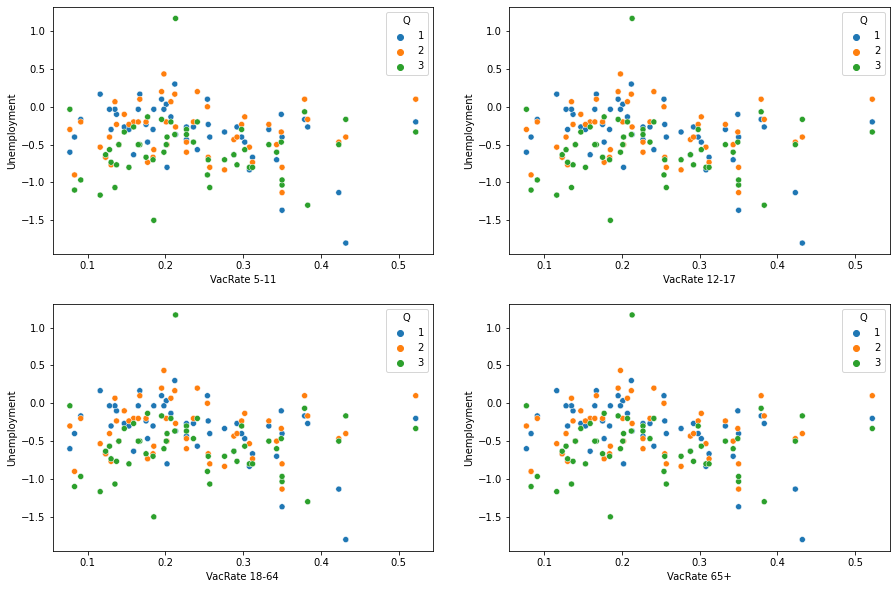

In [462]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '5-11'], ax = axes[0,0])
sns.scatterplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '12-17'], ax = axes[0,1])
sns.scatterplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '18-64'], ax = axes[1,0])
sns.scatterplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '65+'], ax = axes[1,1])
axes[0,0].set_xlabel('VacRate 5-11')
axes[0,1].set_xlabel('VacRate 12-17')
axes[1,0].set_xlabel('VacRate 18-64')
axes[1,1].set_xlabel('VacRate 65+')

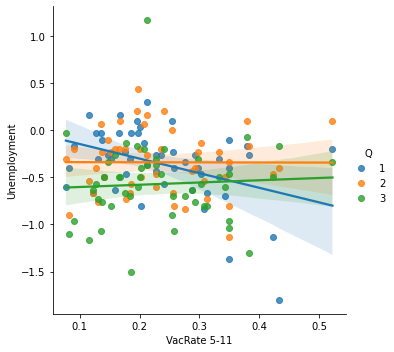

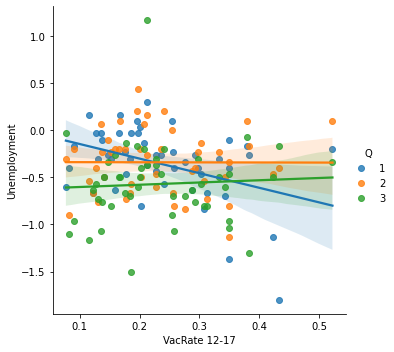

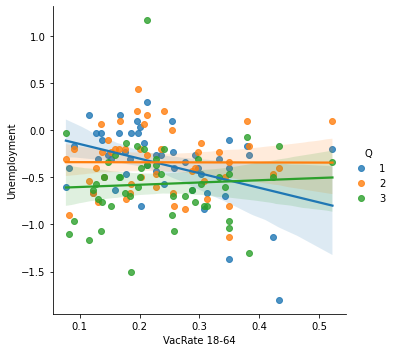

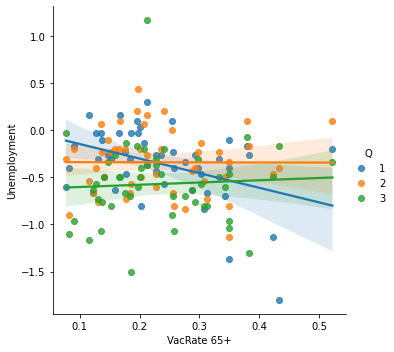

In [463]:
p1 = sns.lmplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '5-11'])
p2 = sns.lmplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '12-17'])
p3 = sns.lmplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '18-64'])
p4 = sns.lmplot(x = "VacRate", y = "Unemployment", hue = "Q", data = un_age[un_age['AgeGroup'] == '65+'])
p1.set_xlabels('VacRate 5-11')
p2.set_xlabels('VacRate 12-17')
p3.set_xlabels('VacRate 18-64')
p4.set_xlabels('VacRate 65+')

We could see a slight positive correlation between vaccination rate for each ages and the change in unemployment rate especially in Q2 and Q3. However, in Q1, the correlation is negative.

In [464]:
def standardize_per(string):
    string = string.lower()
    string = string.strip()
    string = string.replace("%","")
    string = string.strip()
    try:
        output = float(eval(string))/100
    except:
        output = np.nan
    return output

In [465]:
fullyVaccineRate_age["5～11"] = fullyVaccineRate_age["5～11"].apply(standardize_per)
fullyVaccineRate_age["12～17"] = fullyVaccineRate_age["12～17"].apply(standardize_per)
fullyVaccineRate_age["18～64"] = fullyVaccineRate_age["18～64"].apply(standardize_per)
fullyVaccineRate_age["65"] = fullyVaccineRate_age["65"].apply(standardize_per)
fullyVaccineRate_age["standard_deviation"] = fullyVaccineRate_age.std(axis = 1, skipna = True)
fullyVaccineRate_age.rename(columns = {'State':'Location'}, inplace = True)
fullyVaccineRate_age["Location"] = fullyVaccineRate_age["Location"].apply(standardize_location)
gdp_age = pd.merge(stategdp_q3, fullyVaccineRate_age, how="left", on="Location")

In [466]:
gdp_age = gdp_age.drop(columns=['5～11', '12～17','18～64','65'])

In [467]:
out_val_3, pred_val_3 = patsy.dmatrices('gdp ~ standard_deviation', gdp_age)
mod_val_3 = sm.OLS(out_val_3, pred_val_3)
res_val_3 = mod_val_3.fit()
print(res_val_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2277
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.635
Time:                        23:35:18   Log-Likelihood:                 194.24
No. Observations:                  50   AIC:                            -384.5
Df Residuals:                      48   BIC:                            -380.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0172      0

In [468]:
unemployment_age = pd.merge(unemployment_q3, fullyVaccineRate_age, how="left", on="Location")
unemployment_age = unemployment_age.drop(columns=['5～11', '12～17','18～64','65'])

In [469]:
out_val_4, pred_val_4 = patsy.dmatrices('unemployment ~ standard_deviation', unemployment_age)
mod_val_4 = sm.OLS(out_val_4, pred_val_4)
res_val_4 = mod_val_4.fit()
print(res_val_4.summary())

                            OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.001358
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.971
Time:                        23:35:18   Log-Likelihood:                -26.227
No. Observations:                  50   AIC:                             56.45
Df Residuals:                      48   BIC:                             60.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.5488      0

From the two regression results we have, it looks like the inequality of vaccination between age is not a reliable predictor for the state's economic, and especially for its gdp. But we can see a slightly positive relationship with the standard_deviation and economic, which means that the increase of standard_deviation, the vaccination inequity between different ages, the unemployment rate will decrease and the gdp goes up. This rejects our hypothesis.The presence of confounders not accounted for in this study is also a factor that lowers the confidence of the results. Also, the limited data source of the percentage of different age is another problem.

# Ethics & Privacy

<big>Data permission</big>

All data used for analysis in the project are publicly available, sourced from public websites: vaccination information by age and ethnicity, GDP, and unemployment rates by state. The time range is divided based on the time of the first vaccine inoculation, and the time when different variants have an impact can be found on the Internet. Vaccination data for individual states is publicly available.

<big>Data Privacy</big>

Our analysis of vaccinations in individual states does not violate people's privacy because our research based on public data does not involve personal information, as well as the analysis of racial profiling. 

<big>Potential biases</big>

Differences in vaccination rates by race do not directly indicate racial discrimination in states. This is just a correlational study, designed to analyze the variables that affect the economic recovery in each state. The analysis and results of the project do not represent any views or political opinions of the group. 
Implication

The conclusions of this project are for reference only. This project attempts to explain the correlation between vaccination and economic recovery and to understand the relationships between variables and underlying causes, so it does not provide any assessment or guidance for economic recovery or vaccine policy. 


# Conclusion & Discussion

This project set out to investigate the correlation between vaccination rates and economic recovery, and specifically the impact of vaccine inequality on economic recovery in different states in the U.S. Since economic recovery itself is an abstract concept, we used GDP and unemployment as indicators. In addition, we employed the data in 2019, 2020, 2021 to represent states’ economies in three phases - before the pandemic, withstanding the pandemic without vaccination, and the vaccination had been promoted - respectively. Comparing states’ economy in these three phases made us intuitively understand whether the economies recovered, and how it related to vaccination.

After we collected data, we attempted to calculate whether vaccination inequalities existed from vaccination rates across ethnic and age groups in various states, and whether these inequities had an impact on states’ GDP and unemployment. Analyzing all the datasets, we found that the relationship between vaccination inequality by race and age range was not strongly correlated with the state's unemployment rate and GDP. Although the standard deviation of age and race is negatively correlated with the economy, meaning that an increase in standard deviation lowers the vaccination inequality between different races, the r-squared value shows a limited relationship between inequality and unemployment and GDP. Therefore, we reject our null hypothesis that vaccination inequality is positively correlated with lower GDP and higher unemployment. In other words, using the data we have now, we cannot establish a statistically significant correlation, so that racial and age-specific disparities in vaccination are not reliable predictors of a state's economic recovery under the Covid period.

Admittedly, the reason for this result may be due to flaws and limitations in our experiment. One of them is that the state's economy is subject to a lot of confounding variables that we could not analyze. The presence of confounders not accounted for in this study is also a factor that lowers the confidence of the results. We couldn’t rule out, for example, the different state policy about quarantine and work resumption and impact of the presidential transition in 2021 on the economic recovery. Another limitation of our study is that although we found that the economic recovery of U.S. states had little to do with vaccination inequality, we did observe a coincide with the advent of vaccines and the rise of the GDP and fall of unemployment rate in 2021, but we failed to explore whether there was a relationship. Even though we cannot conclude that vaccination in general has had a positive effect on economic recovery, we can still see that vaccinations are beneficial to society. In addition, we believed that the fact that this experiment did not confirm our hypothesis does not mean that the experiment failed. While vaccination inequality has had little impact on economic recovery, we observed that it does exist in many states. We hope that this experiment would allow society to pay more attention to minority groups, protect their rights, and give them equal access to vaccines. 


# Team Contributions

Each member of our group completed an equal part of the project with passion and responsibility. 

Yuchen Jin: Gathered, cleaned, and visualized datasets on overall vaccination coverage by state. Calculated and visualized the relationship between vaccination rates and GDP and unemployment in different age groups. 

Shihan Qian: Researched and wrote background and prior work. Gathered, cleaned, and visualized datasets on race and vaccination coverage. Calculated and visualized the relationship between ethnic vaccination rates and GDP and unemployment.

Tessa Liu: Summarized and wrote the hypothesis based on group discussion. Gathered, cleaned, and visualized datasets on GDP in 2019-2021. Analysis and wrote the conclusion. 

Enhao Wan: Researched and wrote background and prior work. Gathered, cleaned, and visualized datasets on employment in 2019-2021. Made and edited the video about the overall project. 

Jiying wang: Wrote the overview of the project. Gathered, cleaned, and visualized datasets on age and vaccination coverage. Analyzed and wrote the discussion and limitations of the project. 